# Training

In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader
import tqdm

import matplotlib.pyplot as plt

In [2]:
from src.starcattovae.training.data import Data

from src.starcattovae.nn.decoder import Decoder
from src.starcattovae.nn.encoder import Encoder
from src.starcattovae.nn.model import Model

from src.starcattovae.plotting import plot_loss
from src.starcattovae.plotting import plot_reconstruction
from src.starcattovae.plotting import plot_waveform_grid

In [3]:
manualSeed = 99
np.random.seed(manualSeed)
torch.manual_seed(manualSeed)
torch.use_deterministic_algorithms(True) # Needed for reproducible results

### Define Parameters

In [4]:
# configure parameters
if torch.backends.mps.is_available() and torch.backends.mps.is_built():
    DEVICE = "mps"
else:
    DEVICE = "cpu"

print(f"Using device: {DEVICE}")

# model parameters
batch_size = 32
epochs = 320

x_dim = 256
hidden_dim = 512
latent_dim = 64
lr = 1e-3

Using device: mps


## Load Training Data

In [5]:
np.random.seed(42)
indices = np.arange(1684) # this is the number of signals minus all the signals with beta_IC_b less than 0
np.random.shuffle(indices)
split_ratio = 0.9
split_idx = int(len(indices) * split_ratio)
train_indices = indices[:split_idx]
test_indices = indices[split_idx:]

# Create train and test datasets
train_dataset = Data(indices=train_indices, train=True)
test_dataset = Data(indices=test_indices, train=False)

# Check for overlap
train_indices_set = set(train_dataset.get_indices())
test_indices_set = set(test_dataset.get_indices())

overlap = train_indices_set.intersection(test_indices_set)
if len(overlap) == 0:
    print("Train and test sets are different.")
else:
    print("Train and test sets have overlap.")

Train and test sets are different.


In [6]:
train_dataset.summary()
test_dataset.summary()

2024-11-12 23:30:34.637 | INFO     | src.starcattovae.training.data:summary:96 - Signal Dataset mean: -0.524 +/- 39.879
Signal Dataset scaling factor (to match noise in generator): 5
Signal Dataset max value: 656.2575073242188
Signal Dataset shape: (256, 1515)

2024-11-12 23:30:34.638 | INFO     | src.starcattovae.training.data:summary:96 - Signal Dataset mean: -0.444 +/- 38.309
Signal Dataset scaling factor (to match noise in generator): 5
Signal Dataset max value: 626.9296875
Signal Dataset shape: (256, 169)



In [7]:
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

## Load Autoencoders

In [8]:
encoder = Encoder(input_dim=x_dim, hidden_dim=hidden_dim, latent_dim=latent_dim)
decoder = Decoder(latent_dim=latent_dim, hidden_dim = hidden_dim, output_dim = x_dim)

model = Model(Encoder=encoder, Decoder=decoder, DEVICE=DEVICE).to(DEVICE)

### Loss Function

In [9]:
def loss_function(x, x_hat, mean, log_var):
    # trying multiple losses
    reproduction_loss = nn.functional.binary_cross_entropy(x_hat, x, reduction='sum')
    # reproduction_loss = nn.functional.mse_loss(x_hat, x, reduction='sum')
    # reproduction_loss = nn.functional.l1_loss(x_hat, x, reduction='sum')
    # reproduction_loss = nn.functional.binary_cross_entropy_with_logits(x_hat, x, pos_weight=torch.tensor([1.0]).to(DEVICE), reduction='none')
    KLD      = - 0.5 * torch.sum(1+ log_var - mean.pow(2) - log_var.exp())

    return reproduction_loss + KLD

optimizer = Adam(model.parameters(), lr=lr)

### Train VAE

Start training VAE...
Epoch 1 complete! 	Average Loss: 114.7954
Epoch 2 complete! 	Average Loss: 115.2268
Epoch 3 complete! 	Average Loss: 111.0214
Epoch 4 complete! 	Average Loss: 99.4767
Epoch 5 complete! 	Average Loss: 89.4914
Epoch 6 complete! 	Average Loss: 93.1949
Epoch 7 complete! 	Average Loss: 98.6289
Epoch 8 complete! 	Average Loss: 107.3924
Epoch 9 complete! 	Average Loss: 117.4292
Epoch 10 complete! 	Average Loss: 123.8036


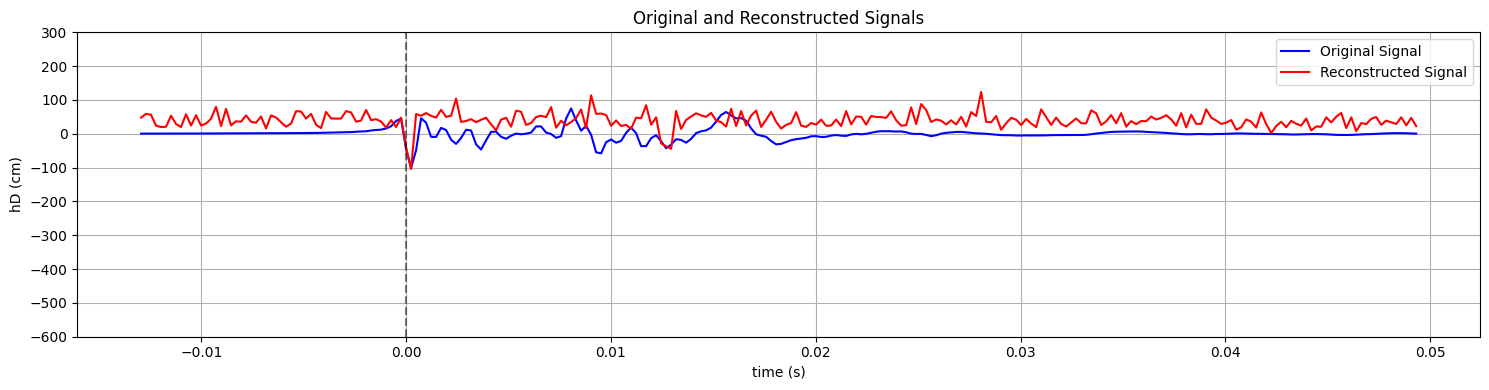

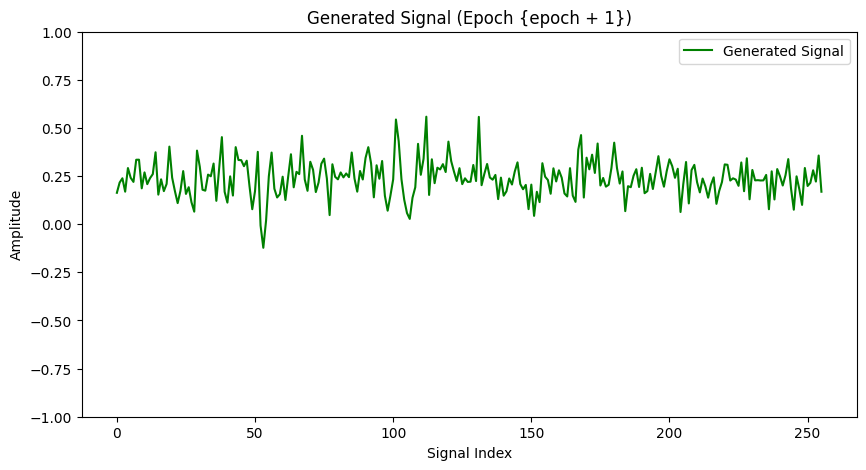

Epoch 11 complete! 	Average Loss: 123.8254
Epoch 12 complete! 	Average Loss: 120.9458
Epoch 13 complete! 	Average Loss: 116.1747
Epoch 14 complete! 	Average Loss: 111.0276
Epoch 15 complete! 	Average Loss: 107.6531
Epoch 16 complete! 	Average Loss: 113.1599
Epoch 17 complete! 	Average Loss: 105.1148
Epoch 18 complete! 	Average Loss: 86.0921
Epoch 19 complete! 	Average Loss: 98.2483
Epoch 20 complete! 	Average Loss: 108.2807


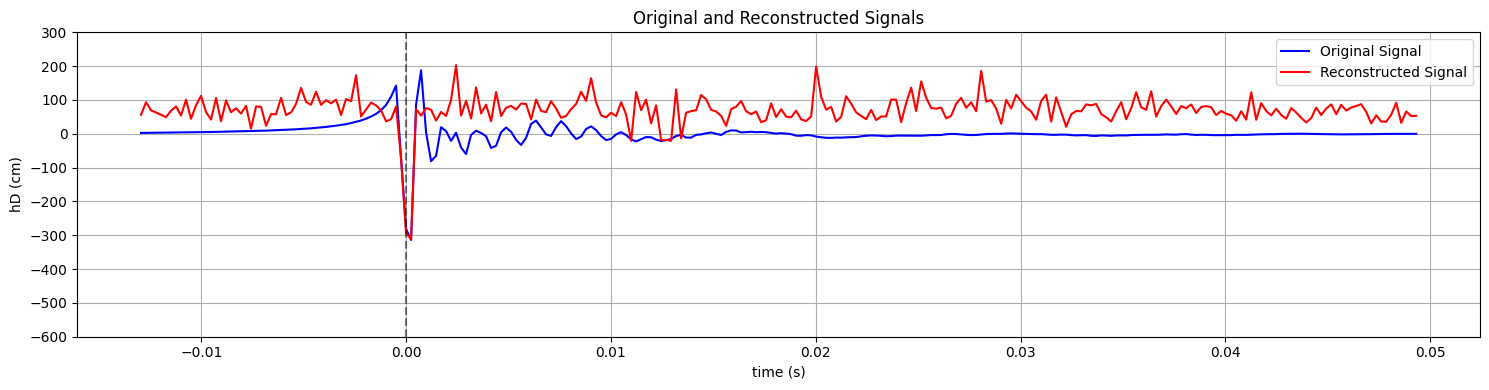

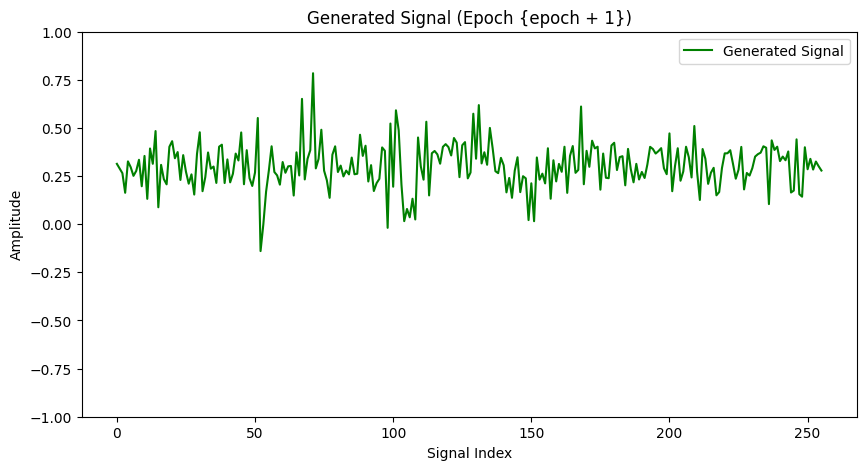

Epoch 21 complete! 	Average Loss: 115.8298
Epoch 22 complete! 	Average Loss: 123.9040
Epoch 23 complete! 	Average Loss: 126.6457
Epoch 24 complete! 	Average Loss: 130.2672
Epoch 25 complete! 	Average Loss: 130.5653
Epoch 26 complete! 	Average Loss: 129.1933
Epoch 27 complete! 	Average Loss: 132.5742
Epoch 28 complete! 	Average Loss: 134.4131
Epoch 29 complete! 	Average Loss: 136.5605
Epoch 30 complete! 	Average Loss: 139.5219


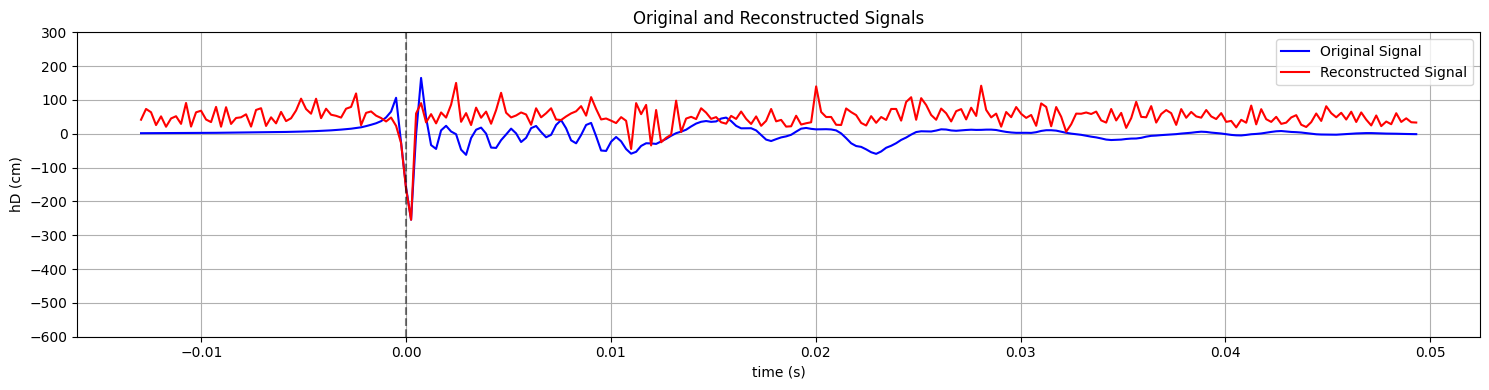

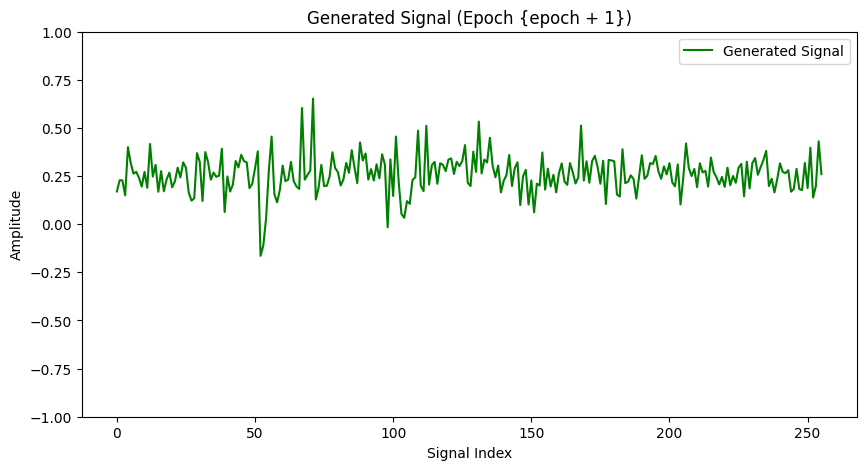

Epoch 31 complete! 	Average Loss: 142.0000
Epoch 32 complete! 	Average Loss: 143.1514
Epoch 33 complete! 	Average Loss: 147.0251
Epoch 34 complete! 	Average Loss: 146.9342
Epoch 35 complete! 	Average Loss: 139.3737
Epoch 36 complete! 	Average Loss: 138.2978
Epoch 37 complete! 	Average Loss: 141.1525
Epoch 38 complete! 	Average Loss: 145.8399
Epoch 39 complete! 	Average Loss: 147.6279
Epoch 40 complete! 	Average Loss: 144.6897


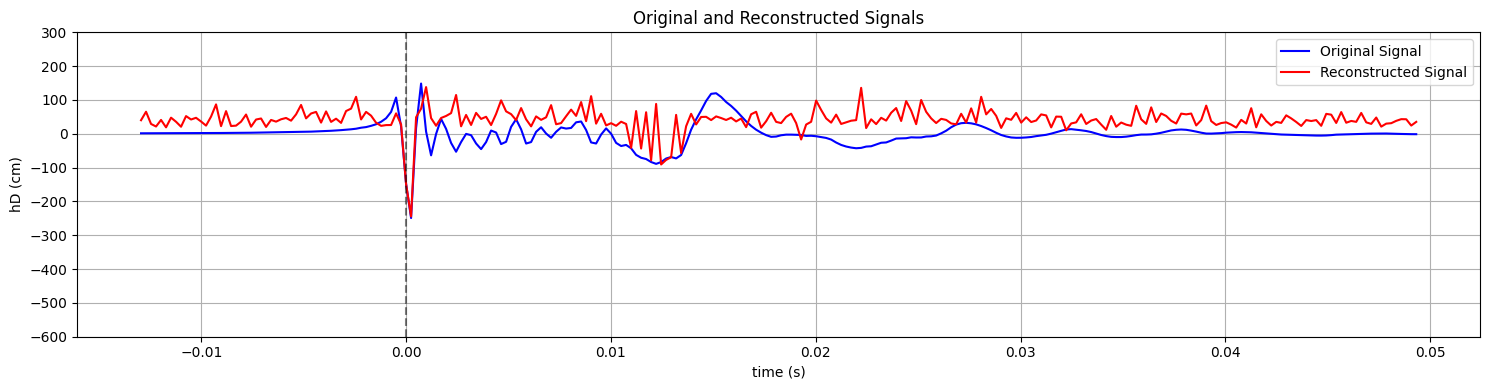

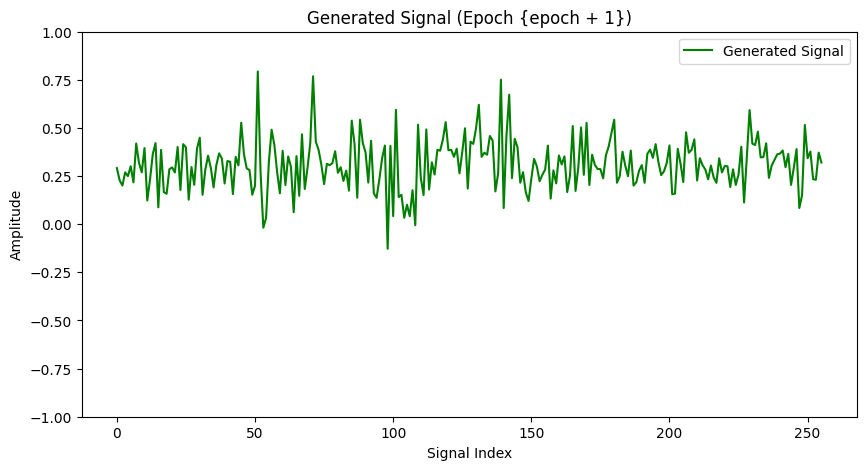

Epoch 41 complete! 	Average Loss: 139.0115
Epoch 42 complete! 	Average Loss: 139.5618
Epoch 43 complete! 	Average Loss: 140.0123
Epoch 44 complete! 	Average Loss: 131.7661
Epoch 45 complete! 	Average Loss: 124.0522
Epoch 46 complete! 	Average Loss: 93.0369
Epoch 47 complete! 	Average Loss: 76.4360
Epoch 48 complete! 	Average Loss: 62.3893
Epoch 49 complete! 	Average Loss: 59.9072
Epoch 50 complete! 	Average Loss: 68.2627


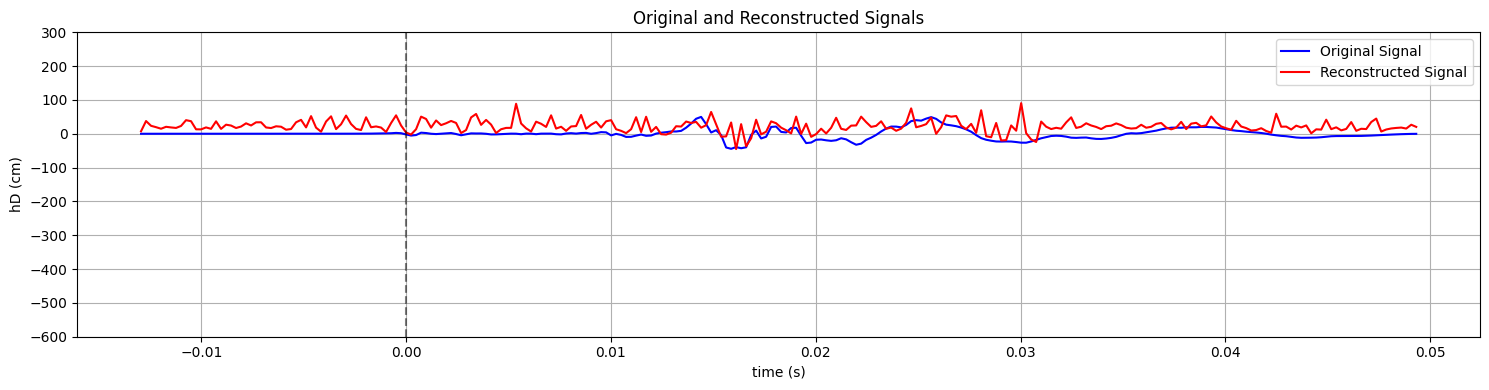

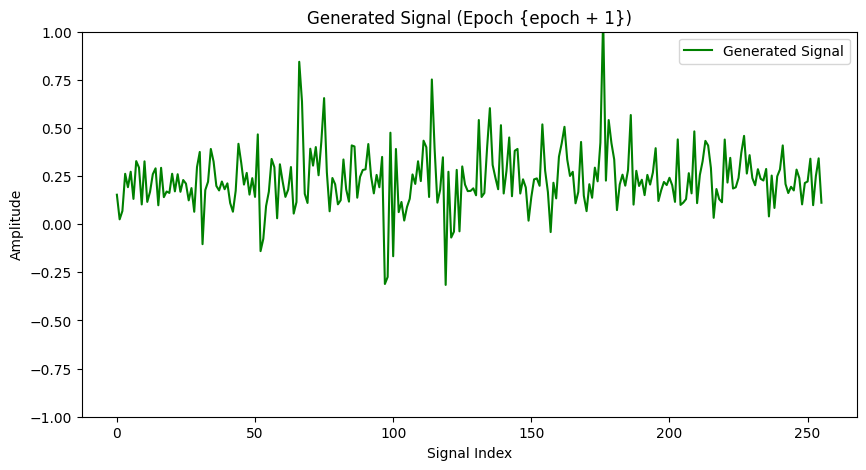

Epoch 51 complete! 	Average Loss: 69.6676
Epoch 52 complete! 	Average Loss: 65.3639
Epoch 53 complete! 	Average Loss: 59.7478
Epoch 54 complete! 	Average Loss: 67.7544
Epoch 55 complete! 	Average Loss: 66.9874
Epoch 56 complete! 	Average Loss: 67.5764
Epoch 57 complete! 	Average Loss: 72.6755
Epoch 58 complete! 	Average Loss: 71.2189
Epoch 59 complete! 	Average Loss: 68.8836
Epoch 60 complete! 	Average Loss: 73.7269


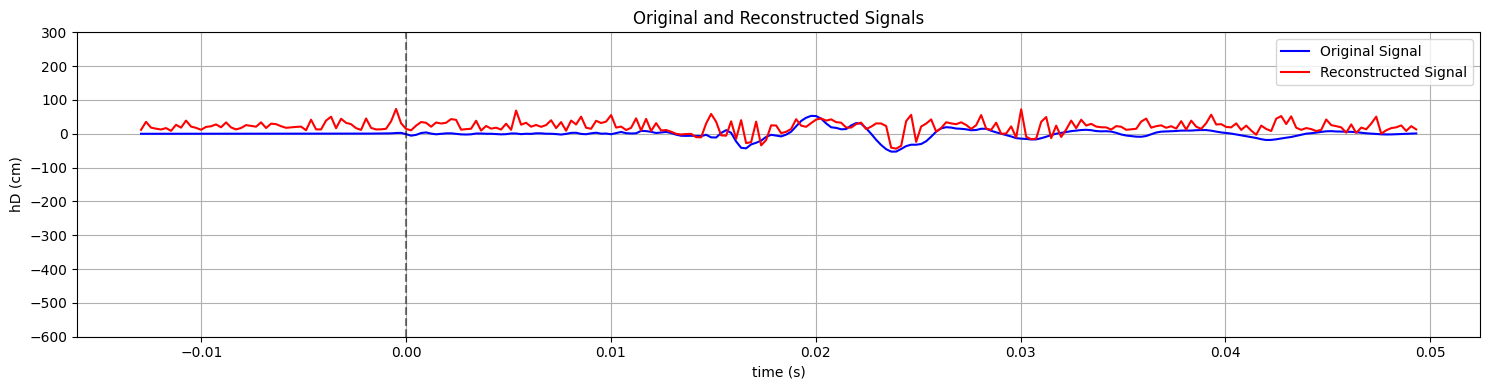

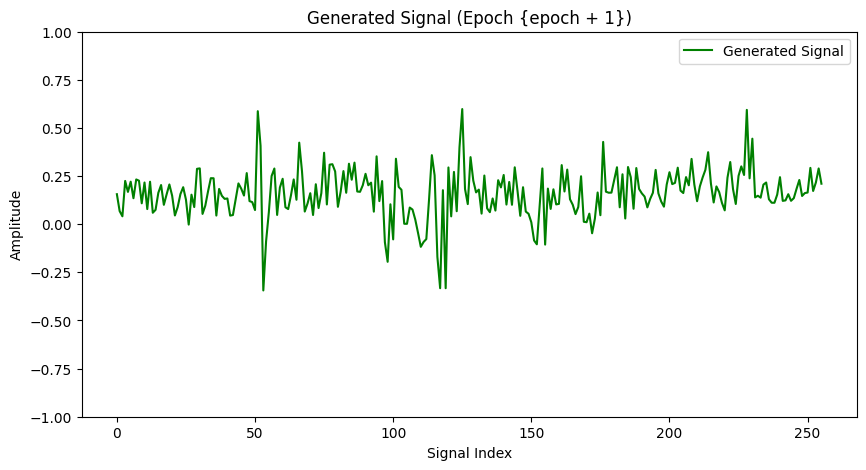

Epoch 61 complete! 	Average Loss: 72.1956
Epoch 62 complete! 	Average Loss: 69.9007
Epoch 63 complete! 	Average Loss: 62.8826
Epoch 64 complete! 	Average Loss: 68.6340
Epoch 65 complete! 	Average Loss: 67.1148
Epoch 66 complete! 	Average Loss: 62.9764
Epoch 67 complete! 	Average Loss: 66.3880
Epoch 68 complete! 	Average Loss: 68.8967
Epoch 69 complete! 	Average Loss: 73.9122
Epoch 70 complete! 	Average Loss: 72.2686


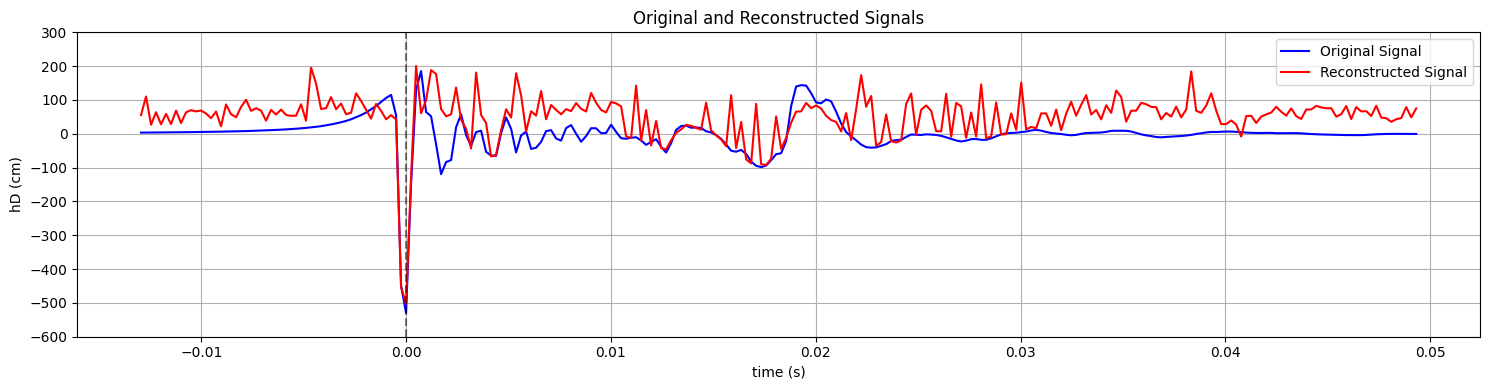

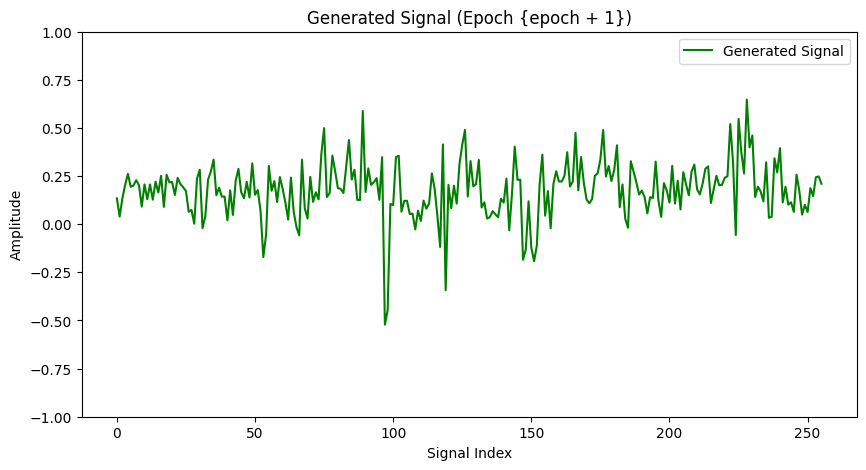

Epoch 71 complete! 	Average Loss: 71.9406
Epoch 72 complete! 	Average Loss: 77.3620
Epoch 73 complete! 	Average Loss: 72.4049
Epoch 74 complete! 	Average Loss: 72.8448
Epoch 75 complete! 	Average Loss: 73.3154
Epoch 76 complete! 	Average Loss: 77.9603
Epoch 77 complete! 	Average Loss: 81.0421
Epoch 78 complete! 	Average Loss: 76.2796
Epoch 79 complete! 	Average Loss: 79.2196
Epoch 80 complete! 	Average Loss: 83.4766


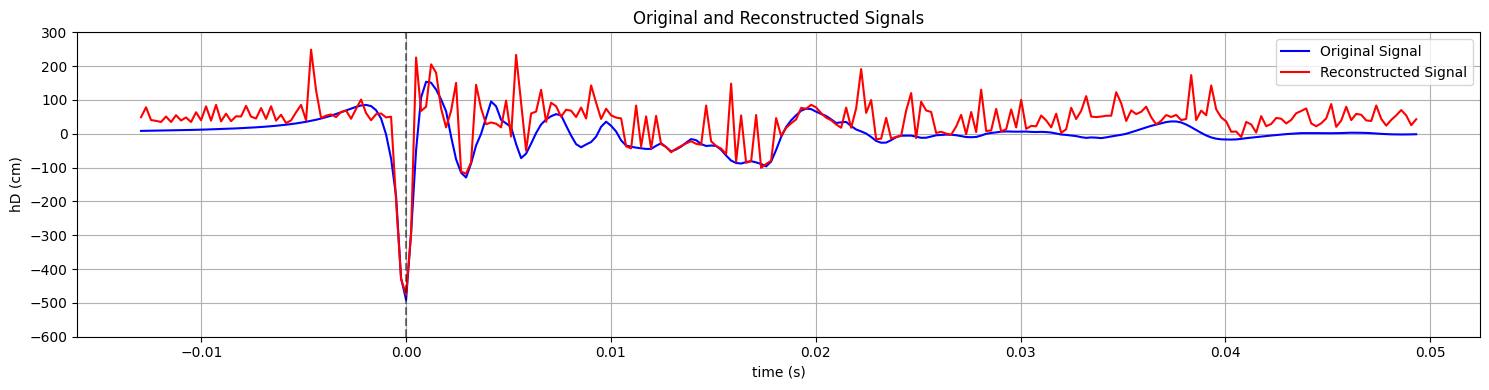

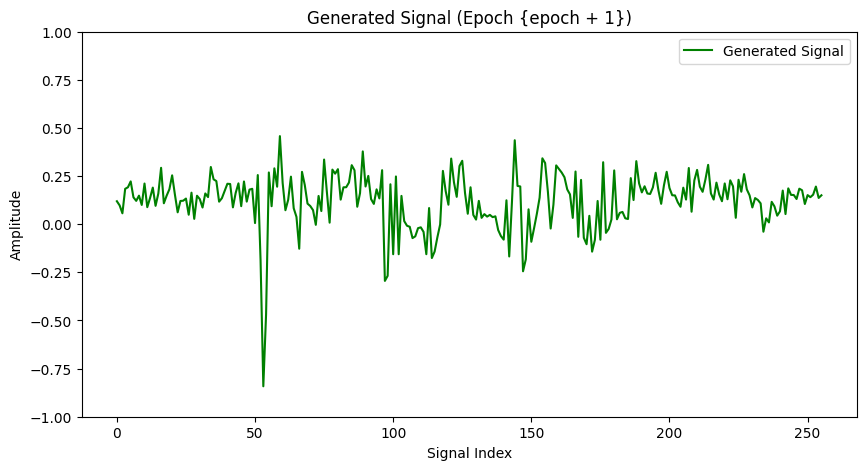

Epoch 81 complete! 	Average Loss: 77.0386
Epoch 82 complete! 	Average Loss: 78.2000
Epoch 83 complete! 	Average Loss: 80.2928
Epoch 84 complete! 	Average Loss: 76.6684
Epoch 85 complete! 	Average Loss: 79.1343
Epoch 86 complete! 	Average Loss: 80.4526
Epoch 87 complete! 	Average Loss: 78.2565
Epoch 88 complete! 	Average Loss: 75.5045
Epoch 89 complete! 	Average Loss: 74.7004
Epoch 90 complete! 	Average Loss: 79.9313


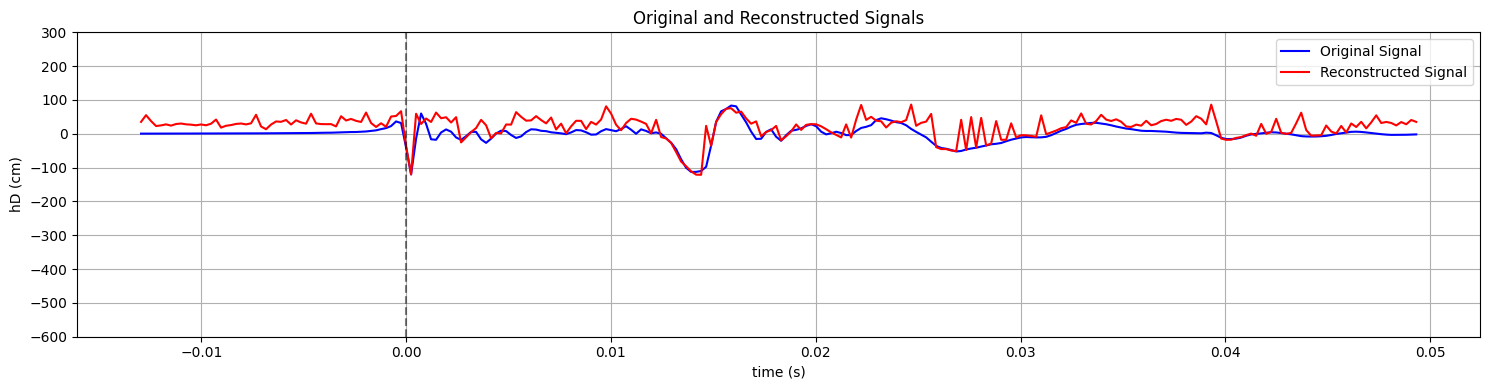

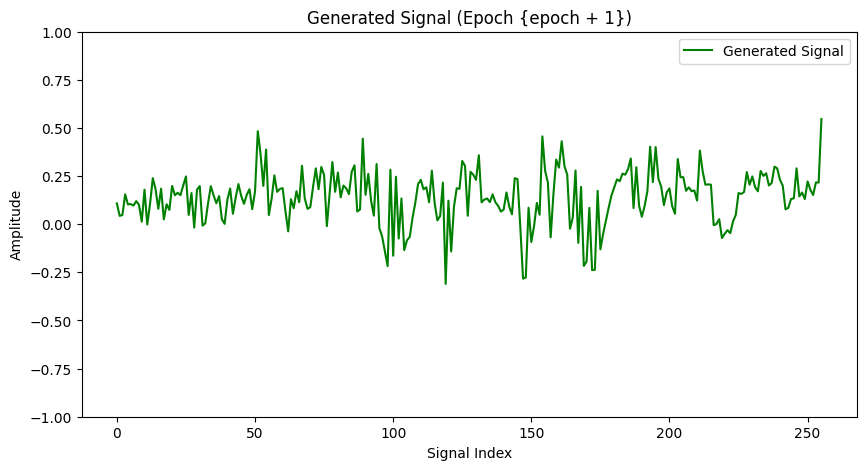

Epoch 91 complete! 	Average Loss: 76.2265
Epoch 92 complete! 	Average Loss: 75.9959
Epoch 93 complete! 	Average Loss: 80.3166
Epoch 94 complete! 	Average Loss: 82.4942
Epoch 95 complete! 	Average Loss: 81.6212
Epoch 96 complete! 	Average Loss: 81.1722
Epoch 97 complete! 	Average Loss: 81.5980
Epoch 98 complete! 	Average Loss: 83.7706
Epoch 99 complete! 	Average Loss: 85.6393
Epoch 100 complete! 	Average Loss: 86.0606


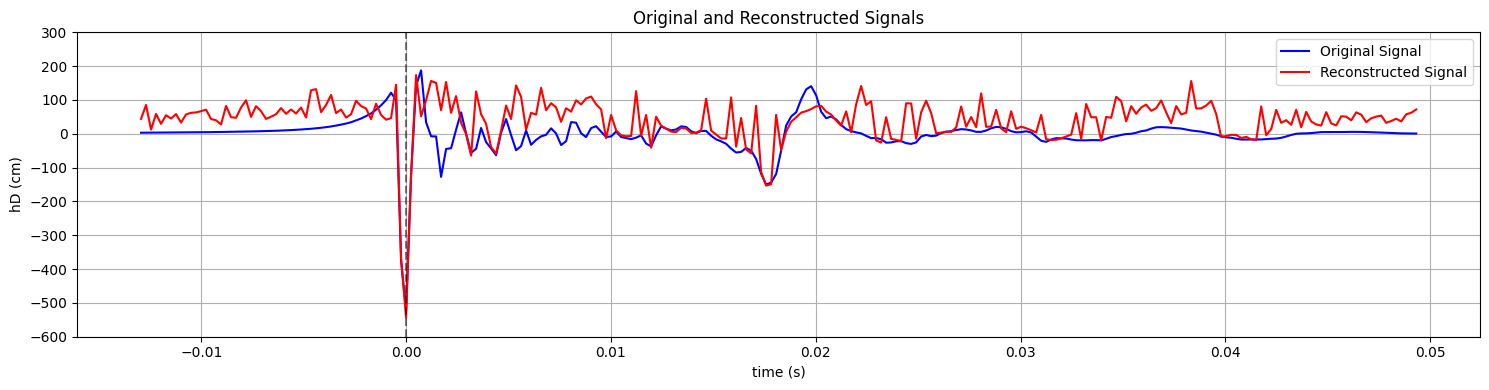

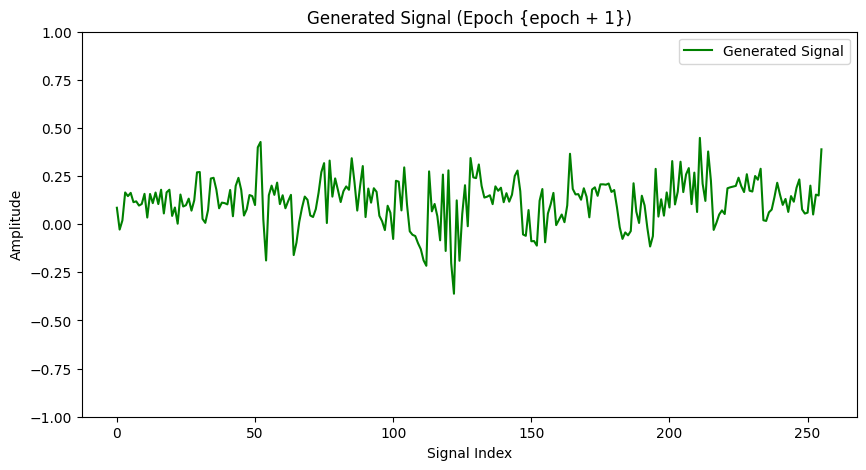

Epoch 101 complete! 	Average Loss: 85.9091
Epoch 102 complete! 	Average Loss: 84.3119
Epoch 103 complete! 	Average Loss: 83.1548
Epoch 104 complete! 	Average Loss: 80.9022
Epoch 105 complete! 	Average Loss: 82.0813
Epoch 106 complete! 	Average Loss: 80.2007
Epoch 107 complete! 	Average Loss: 83.8816
Epoch 108 complete! 	Average Loss: 87.1887
Epoch 109 complete! 	Average Loss: 80.9083
Epoch 110 complete! 	Average Loss: 78.0743


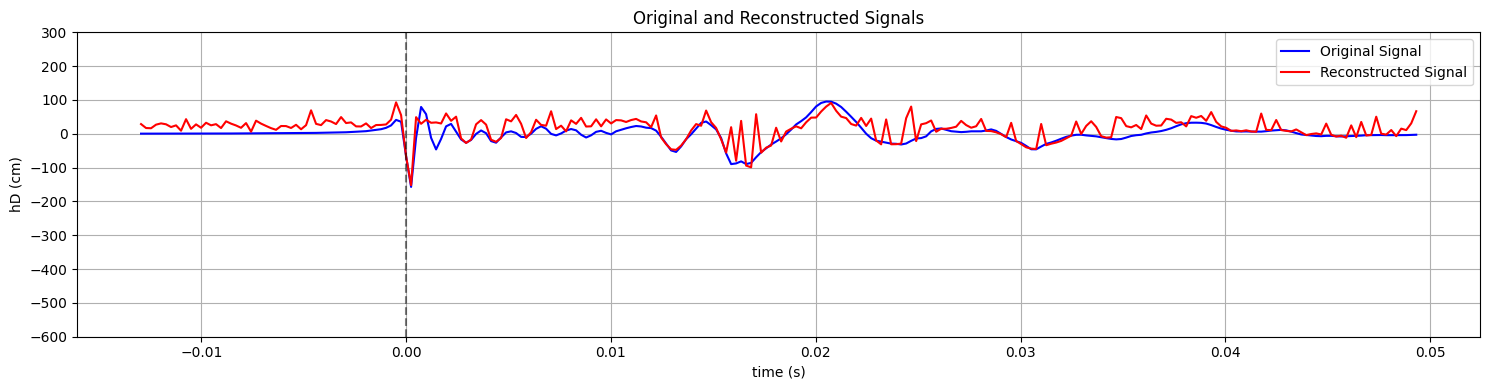

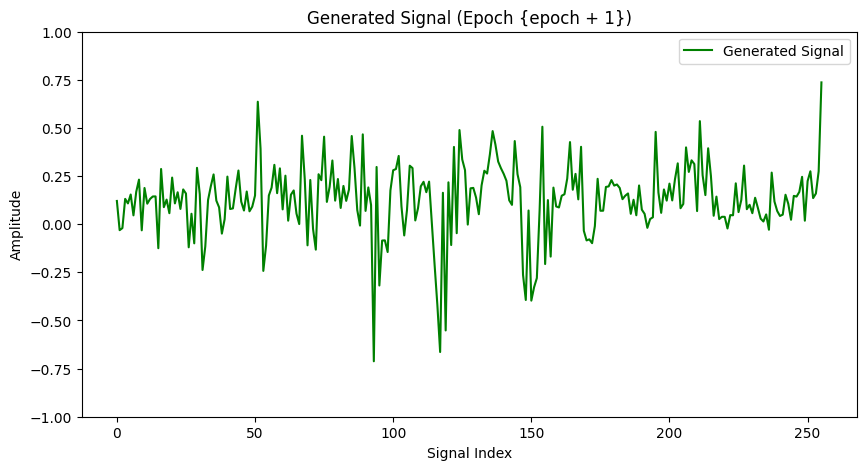

Epoch 111 complete! 	Average Loss: 86.8811
Epoch 112 complete! 	Average Loss: 91.0042
Epoch 113 complete! 	Average Loss: 92.9306
Epoch 114 complete! 	Average Loss: 89.4383
Epoch 115 complete! 	Average Loss: 89.7397
Epoch 116 complete! 	Average Loss: 95.8871
Epoch 117 complete! 	Average Loss: 90.3505
Epoch 118 complete! 	Average Loss: 100.7704
Epoch 119 complete! 	Average Loss: 105.8325
Epoch 120 complete! 	Average Loss: 107.4078


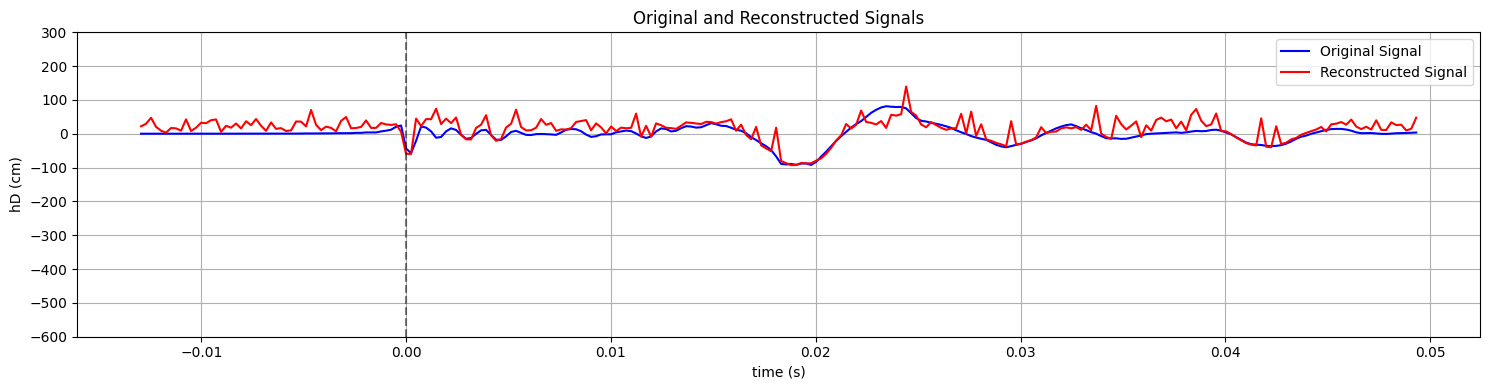

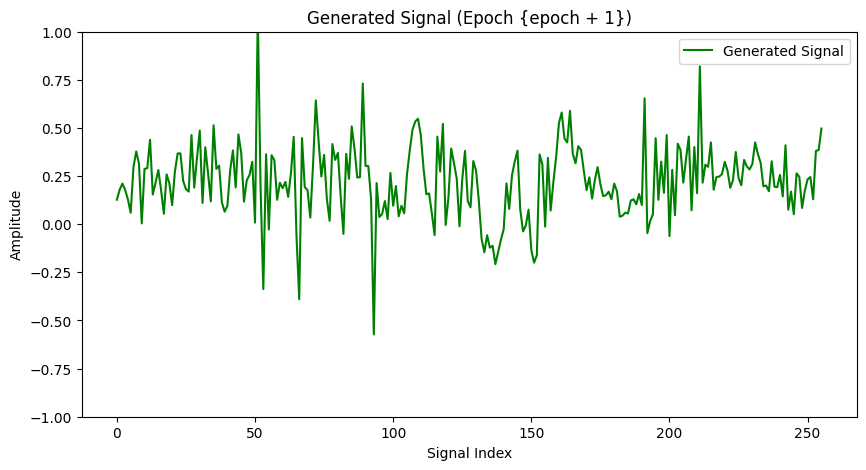

Epoch 121 complete! 	Average Loss: 106.7267
Epoch 122 complete! 	Average Loss: 105.0043
Epoch 123 complete! 	Average Loss: 105.0892
Epoch 124 complete! 	Average Loss: 107.9847
Epoch 125 complete! 	Average Loss: 101.9312
Epoch 126 complete! 	Average Loss: 99.9083
Epoch 127 complete! 	Average Loss: 100.6685
Epoch 128 complete! 	Average Loss: 101.6509
Epoch 129 complete! 	Average Loss: 99.3052
Epoch 130 complete! 	Average Loss: 98.6552


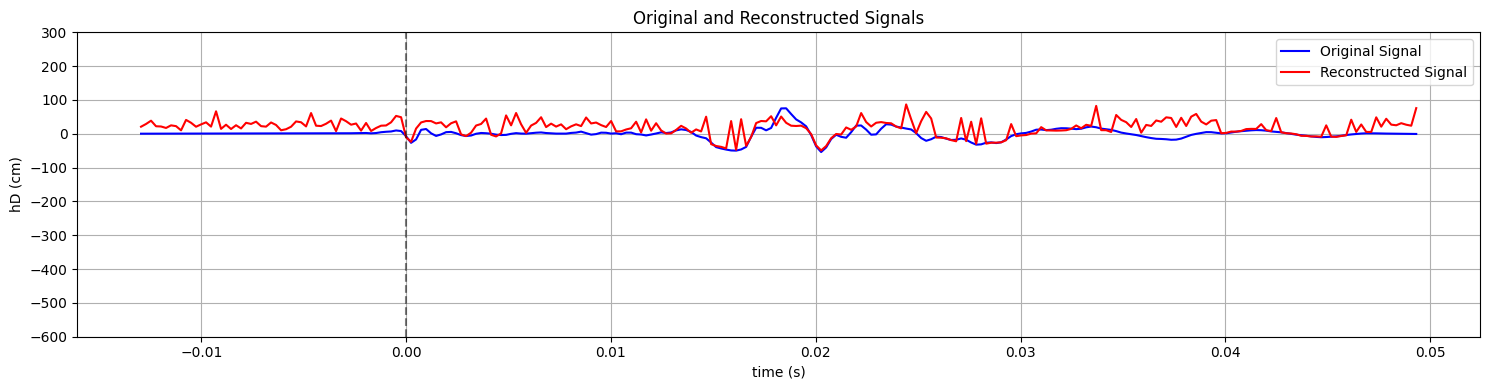

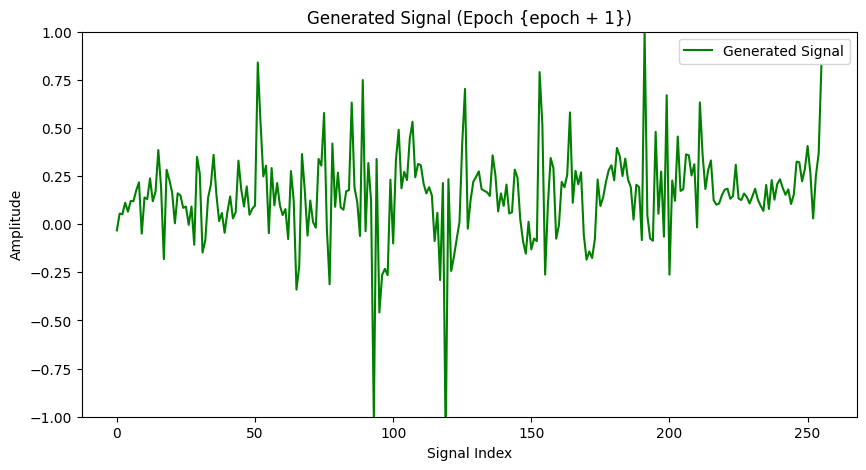

Epoch 131 complete! 	Average Loss: 97.8390
Epoch 132 complete! 	Average Loss: 101.8689
Epoch 133 complete! 	Average Loss: 95.9204
Epoch 134 complete! 	Average Loss: 100.0102
Epoch 135 complete! 	Average Loss: 100.4165
Epoch 136 complete! 	Average Loss: 98.9135
Epoch 137 complete! 	Average Loss: 92.6013
Epoch 138 complete! 	Average Loss: 94.0291
Epoch 139 complete! 	Average Loss: 96.9230
Epoch 140 complete! 	Average Loss: 99.7435


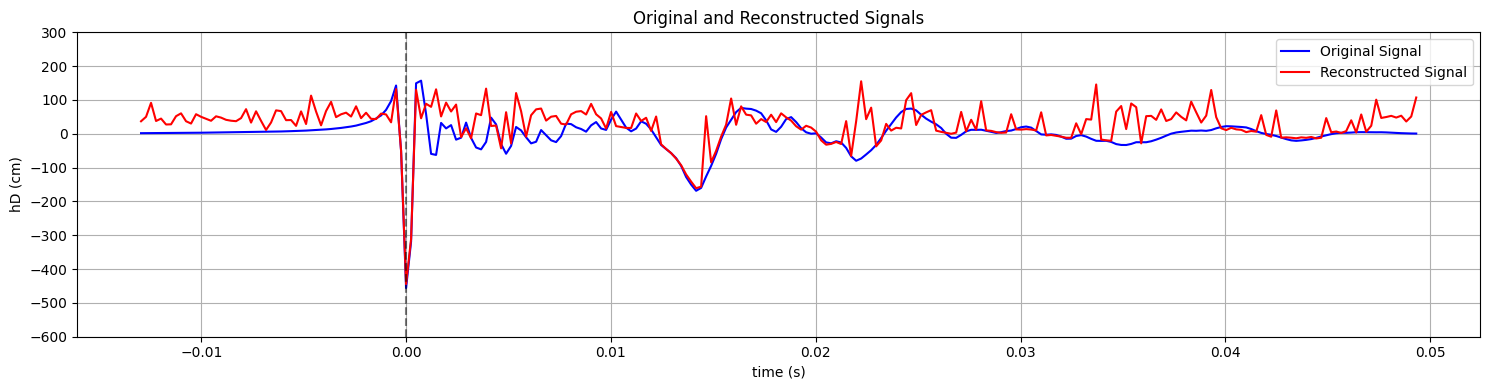

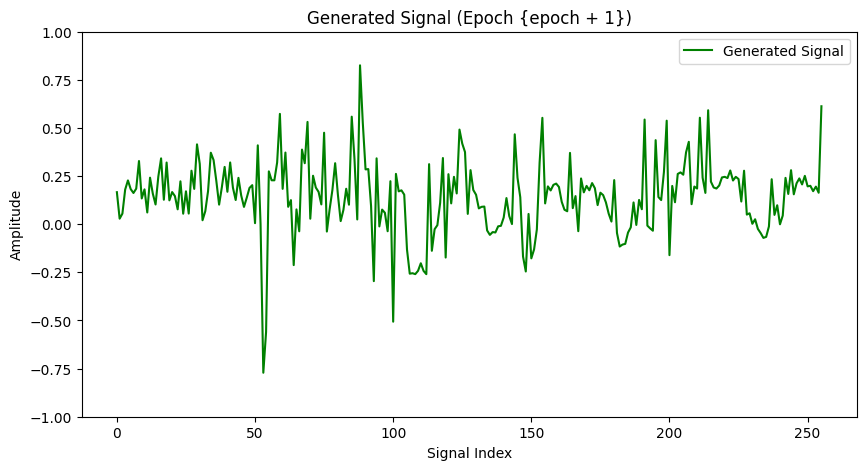

Epoch 141 complete! 	Average Loss: 100.1329
Epoch 142 complete! 	Average Loss: 100.2711
Epoch 143 complete! 	Average Loss: 102.2058
Epoch 144 complete! 	Average Loss: 105.4805
Epoch 145 complete! 	Average Loss: 110.7133
Epoch 146 complete! 	Average Loss: 116.5208
Epoch 147 complete! 	Average Loss: 120.0003
Epoch 148 complete! 	Average Loss: 116.2868
Epoch 149 complete! 	Average Loss: 115.2844
Epoch 150 complete! 	Average Loss: 117.1584


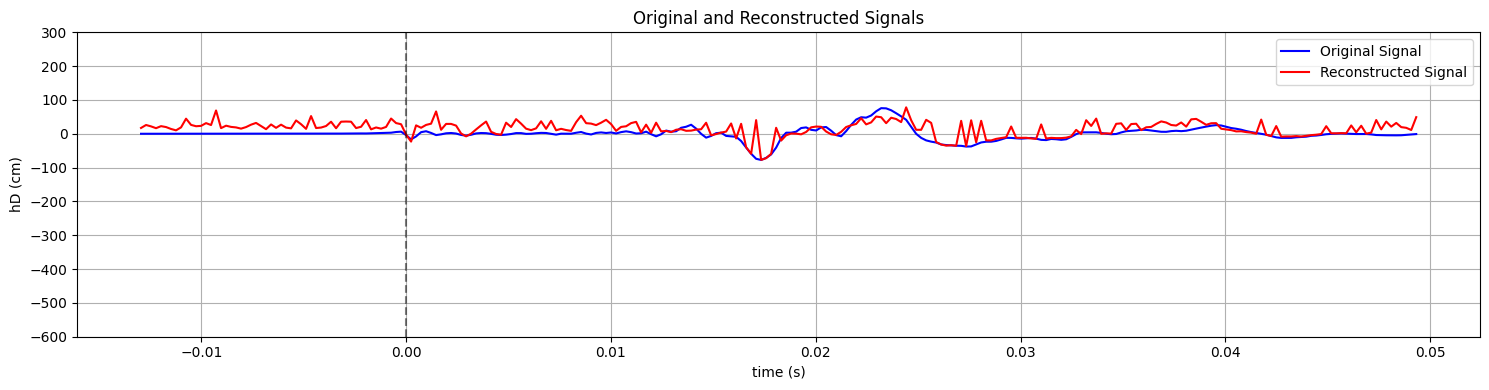

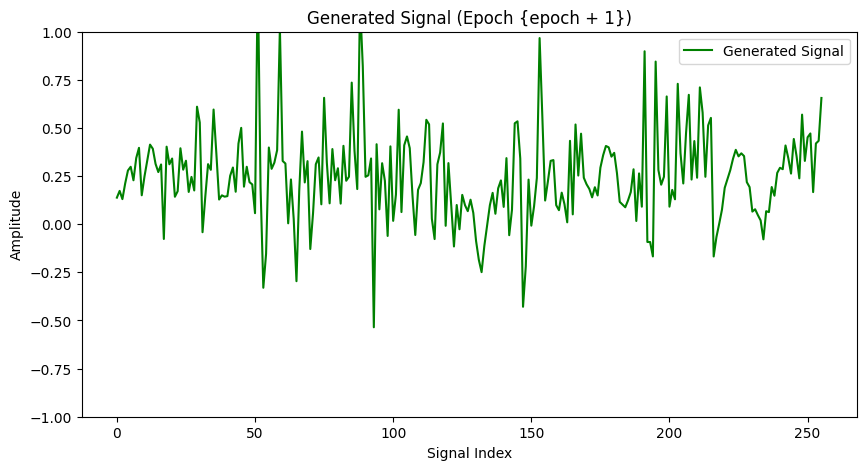

Epoch 151 complete! 	Average Loss: 115.1955
Epoch 152 complete! 	Average Loss: 115.7654
Epoch 153 complete! 	Average Loss: 106.0634
Epoch 154 complete! 	Average Loss: 109.4133
Epoch 155 complete! 	Average Loss: 108.7824
Epoch 156 complete! 	Average Loss: 103.0311
Epoch 157 complete! 	Average Loss: 109.3355
Epoch 158 complete! 	Average Loss: 115.0535
Epoch 159 complete! 	Average Loss: 114.5708
Epoch 160 complete! 	Average Loss: 116.1207


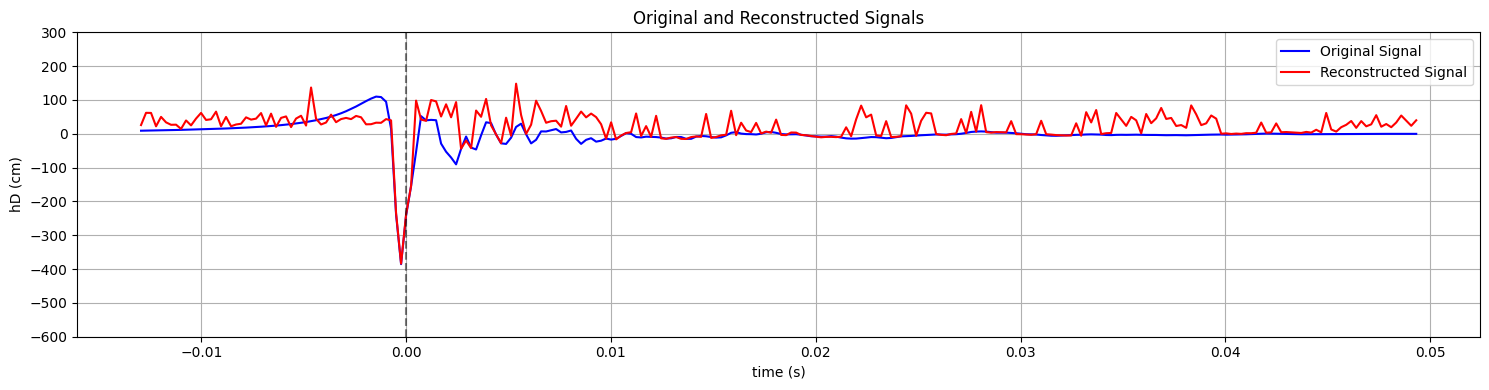

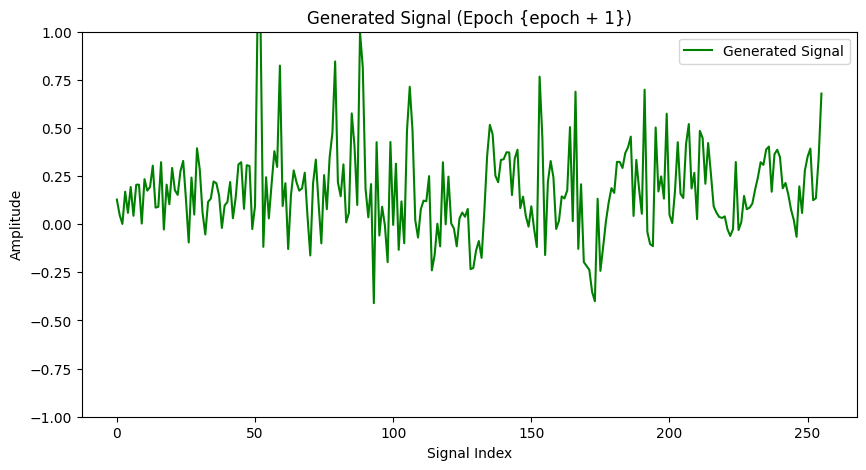

Epoch 161 complete! 	Average Loss: 119.6808
Epoch 162 complete! 	Average Loss: 120.9120
Epoch 163 complete! 	Average Loss: 119.9330
Epoch 164 complete! 	Average Loss: 116.4582
Epoch 165 complete! 	Average Loss: 112.4340
Epoch 166 complete! 	Average Loss: 111.8971
Epoch 167 complete! 	Average Loss: 114.7158
Epoch 168 complete! 	Average Loss: 108.9371
Epoch 169 complete! 	Average Loss: 113.2869
Epoch 170 complete! 	Average Loss: 115.2685


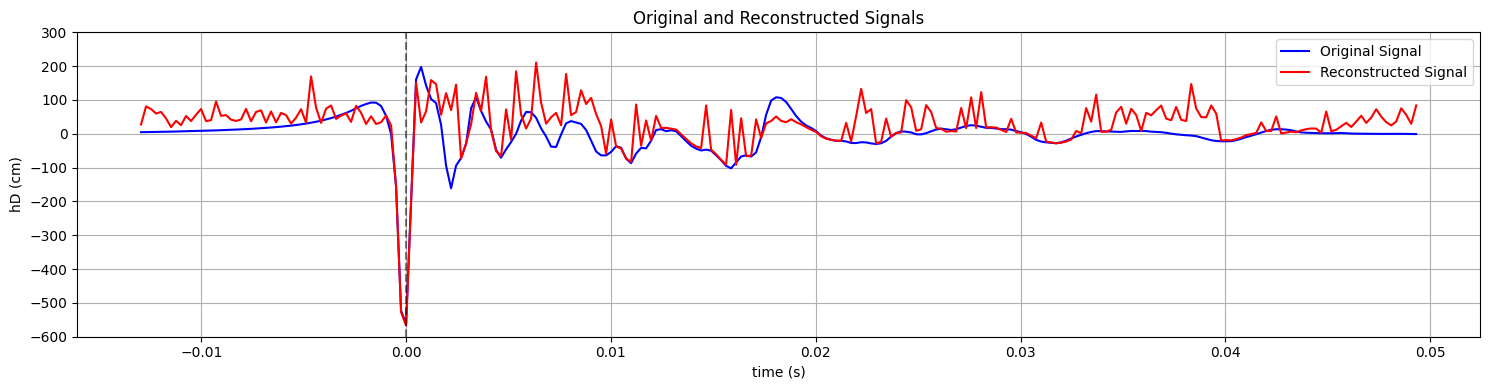

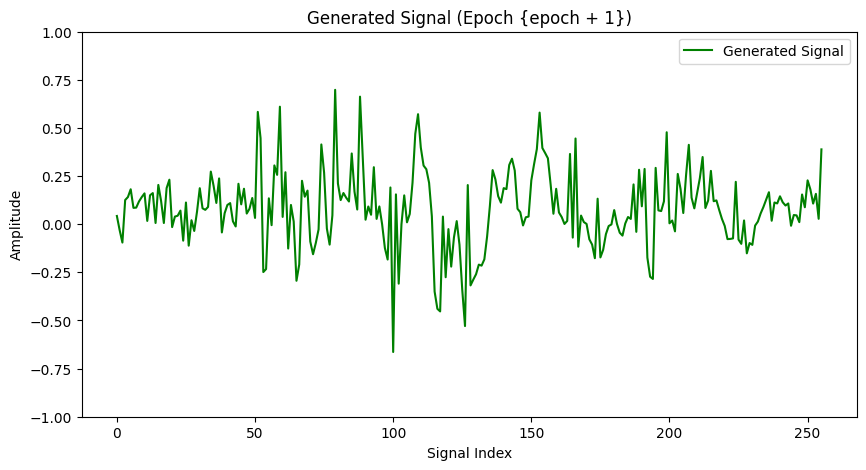

Epoch 171 complete! 	Average Loss: 119.3647
Epoch 172 complete! 	Average Loss: 116.2296
Epoch 173 complete! 	Average Loss: 113.4002
Epoch 174 complete! 	Average Loss: 116.8872
Epoch 175 complete! 	Average Loss: 118.0500
Epoch 176 complete! 	Average Loss: 120.2572
Epoch 177 complete! 	Average Loss: 124.6401
Epoch 178 complete! 	Average Loss: 123.0349
Epoch 179 complete! 	Average Loss: 114.7616
Epoch 180 complete! 	Average Loss: 113.3076


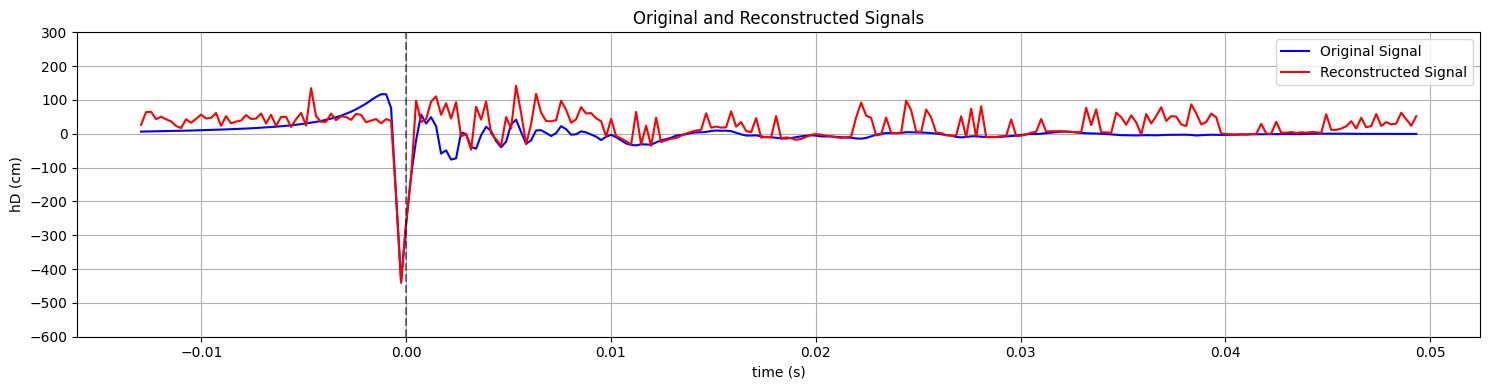

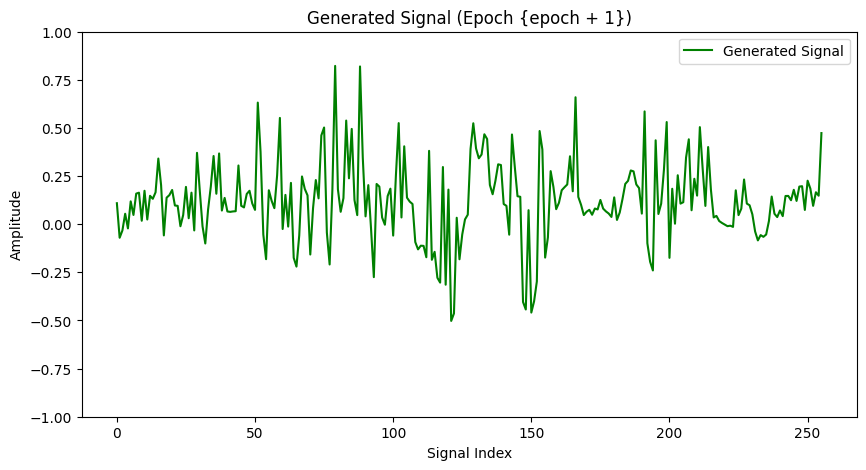

Epoch 181 complete! 	Average Loss: 121.0796
Epoch 182 complete! 	Average Loss: 123.1341
Epoch 183 complete! 	Average Loss: 124.0956
Epoch 184 complete! 	Average Loss: 122.0271
Epoch 185 complete! 	Average Loss: 113.9657
Epoch 186 complete! 	Average Loss: 122.0668
Epoch 187 complete! 	Average Loss: 123.8476
Epoch 188 complete! 	Average Loss: 118.6328
Epoch 189 complete! 	Average Loss: 121.0390
Epoch 190 complete! 	Average Loss: 119.7822


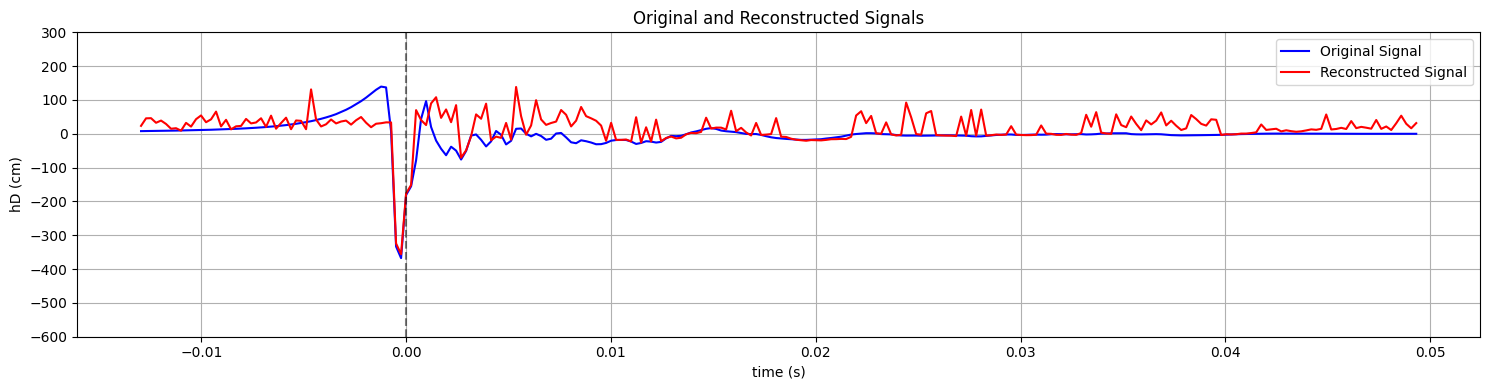

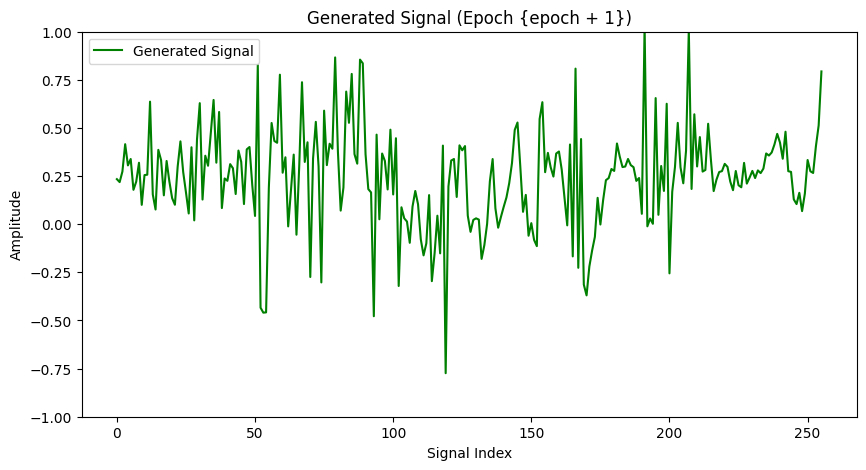

Epoch 191 complete! 	Average Loss: 126.4223
Epoch 192 complete! 	Average Loss: 132.2216
Epoch 193 complete! 	Average Loss: 135.1147
Epoch 194 complete! 	Average Loss: 134.7312
Epoch 195 complete! 	Average Loss: 130.1389
Epoch 196 complete! 	Average Loss: 119.7526
Epoch 197 complete! 	Average Loss: 123.0853
Epoch 198 complete! 	Average Loss: 122.3076
Epoch 199 complete! 	Average Loss: 131.6359
Epoch 200 complete! 	Average Loss: 134.0617


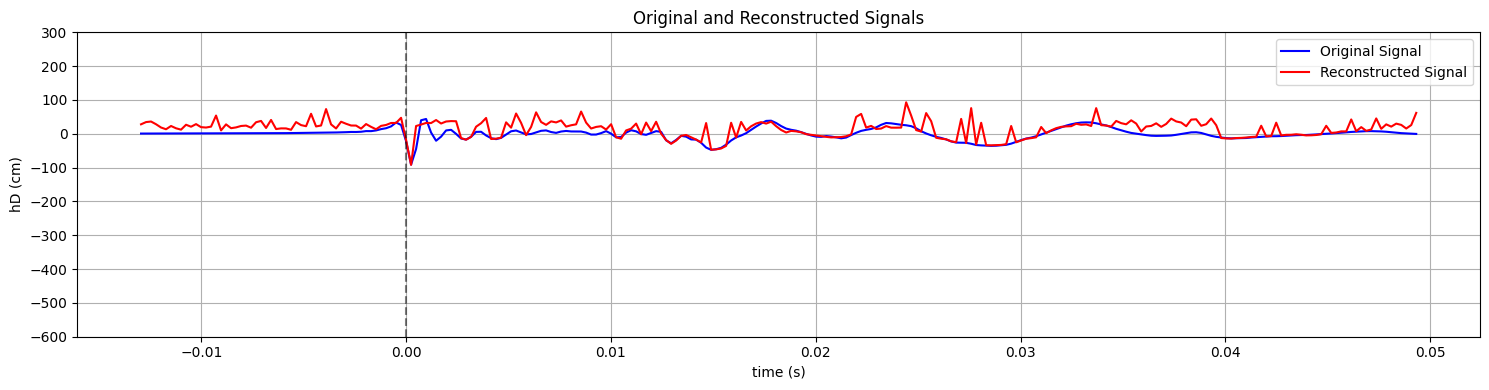

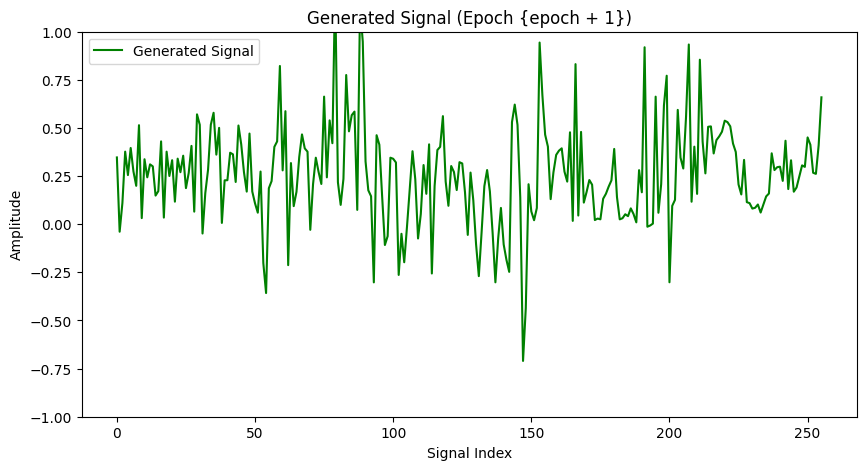

Epoch 201 complete! 	Average Loss: 131.5946
Epoch 202 complete! 	Average Loss: 133.0086
Epoch 203 complete! 	Average Loss: 133.1578
Epoch 204 complete! 	Average Loss: 129.4018
Epoch 205 complete! 	Average Loss: 133.5520
Epoch 206 complete! 	Average Loss: 134.3239
Epoch 207 complete! 	Average Loss: 134.2412
Epoch 208 complete! 	Average Loss: 132.4818
Epoch 209 complete! 	Average Loss: 135.6727
Epoch 210 complete! 	Average Loss: 134.1356


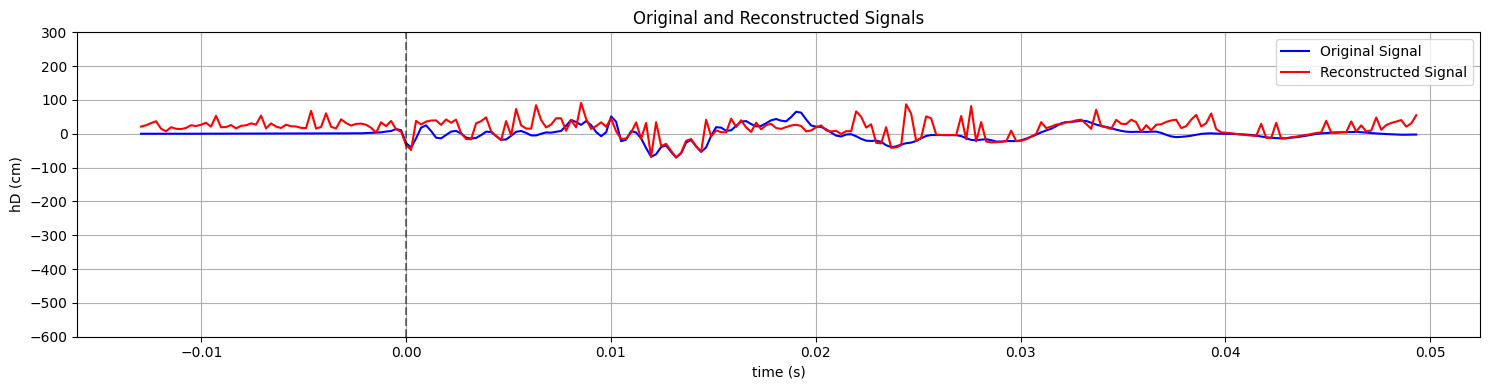

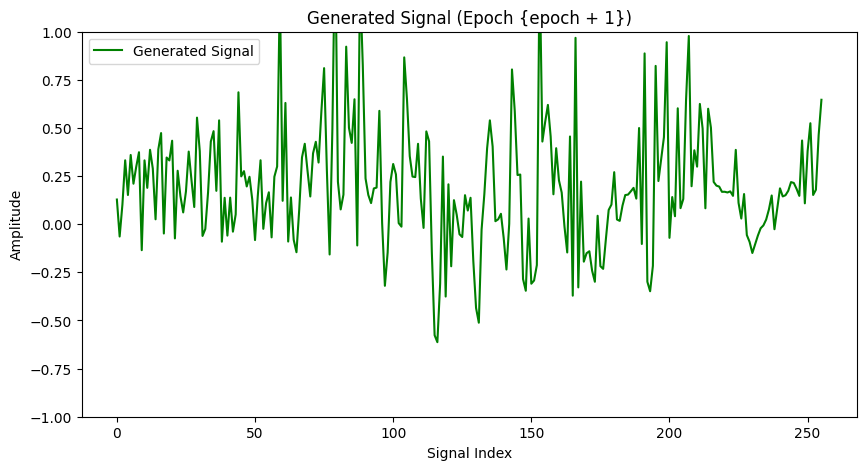

Epoch 211 complete! 	Average Loss: 130.2941
Epoch 212 complete! 	Average Loss: 132.7021
Epoch 213 complete! 	Average Loss: 139.1721
Epoch 214 complete! 	Average Loss: 141.0303
Epoch 215 complete! 	Average Loss: 138.1128
Epoch 216 complete! 	Average Loss: 136.1484
Epoch 217 complete! 	Average Loss: 138.4513
Epoch 218 complete! 	Average Loss: 135.3005
Epoch 219 complete! 	Average Loss: 134.3273
Epoch 220 complete! 	Average Loss: 126.6507


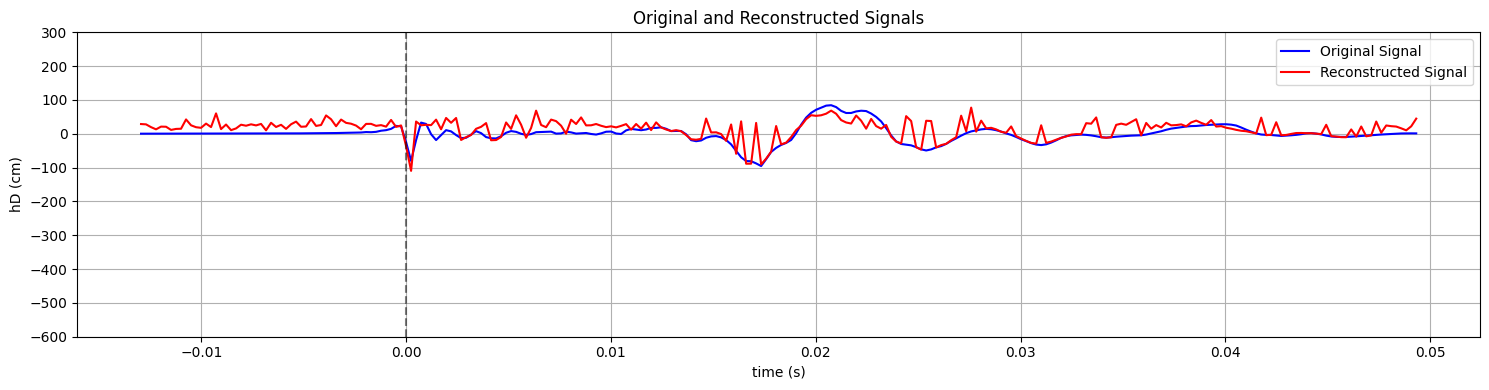

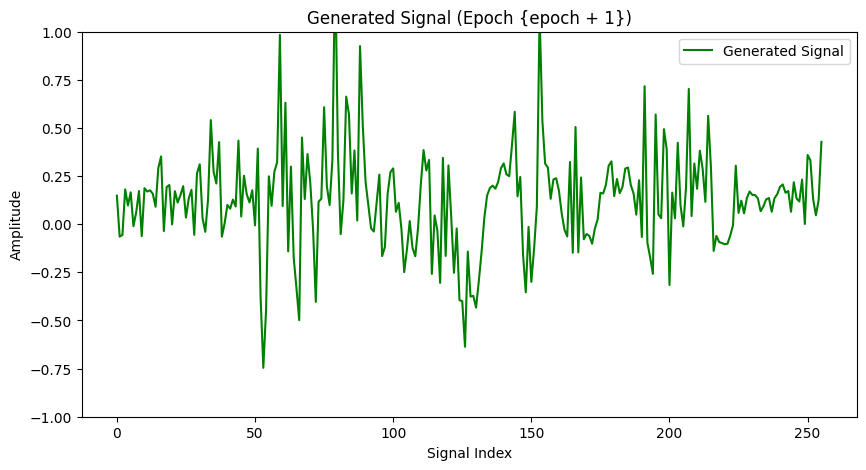

Epoch 221 complete! 	Average Loss: 134.3787
Epoch 222 complete! 	Average Loss: 133.7090
Epoch 223 complete! 	Average Loss: 130.9741
Epoch 224 complete! 	Average Loss: 131.7238
Epoch 225 complete! 	Average Loss: 134.7115
Epoch 226 complete! 	Average Loss: 135.1730
Epoch 227 complete! 	Average Loss: 138.3880
Epoch 228 complete! 	Average Loss: 141.6792
Epoch 229 complete! 	Average Loss: 142.3407
Epoch 230 complete! 	Average Loss: 143.4811


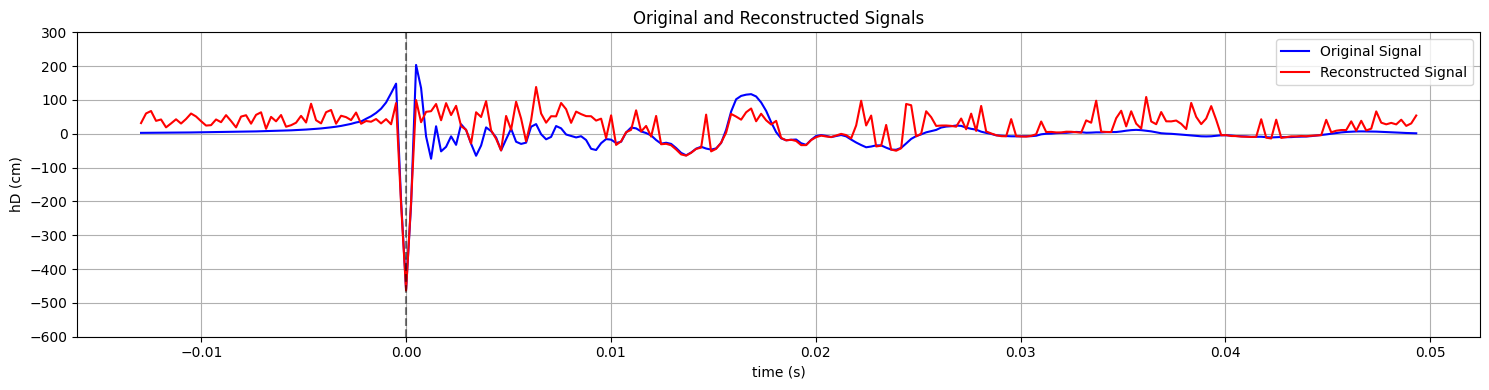

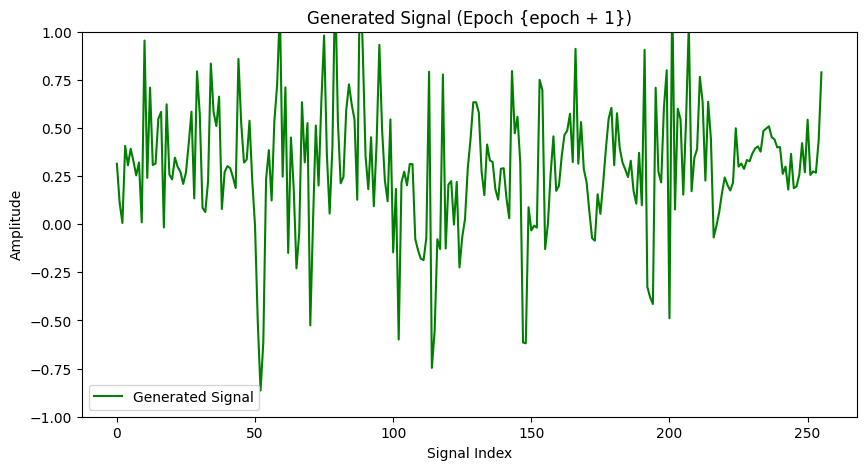

Epoch 231 complete! 	Average Loss: 150.9178
Epoch 232 complete! 	Average Loss: 151.7231
Epoch 233 complete! 	Average Loss: 156.5469
Epoch 234 complete! 	Average Loss: 154.9118
Epoch 235 complete! 	Average Loss: 155.2925
Epoch 236 complete! 	Average Loss: 151.7971
Epoch 237 complete! 	Average Loss: 150.3380
Epoch 238 complete! 	Average Loss: 144.3664
Epoch 239 complete! 	Average Loss: 148.0016
Epoch 240 complete! 	Average Loss: 137.9454


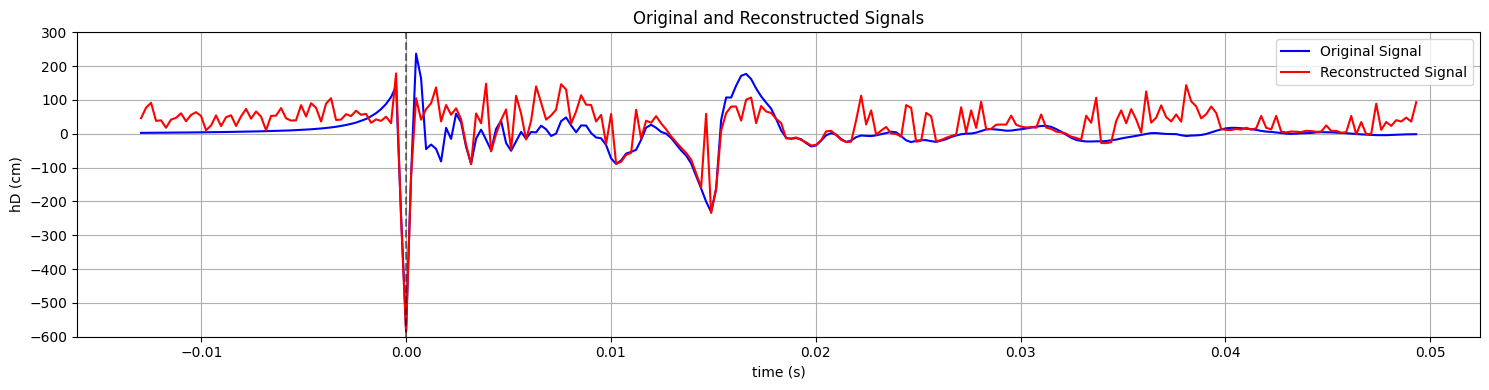

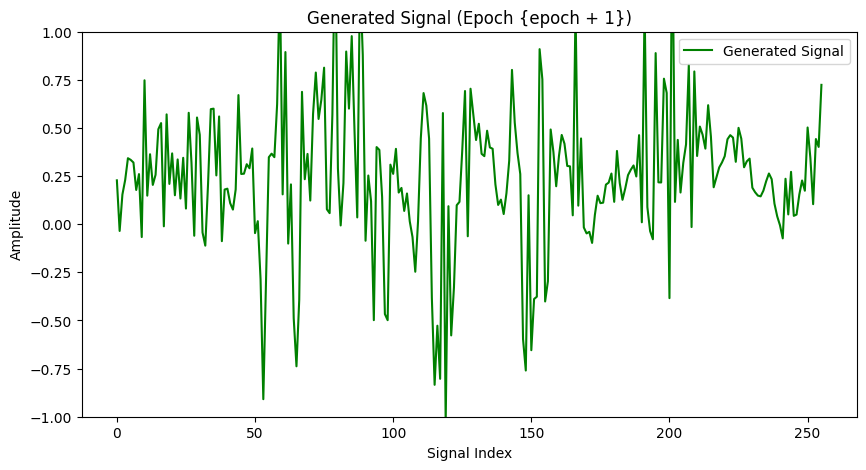

Epoch 241 complete! 	Average Loss: 133.7838
Epoch 242 complete! 	Average Loss: 138.8682
Epoch 243 complete! 	Average Loss: 134.6811
Epoch 244 complete! 	Average Loss: 131.9948
Epoch 245 complete! 	Average Loss: 134.3949
Epoch 246 complete! 	Average Loss: 143.1969
Epoch 247 complete! 	Average Loss: 141.1296
Epoch 248 complete! 	Average Loss: 146.4440
Epoch 249 complete! 	Average Loss: 145.4435
Epoch 250 complete! 	Average Loss: 152.9857


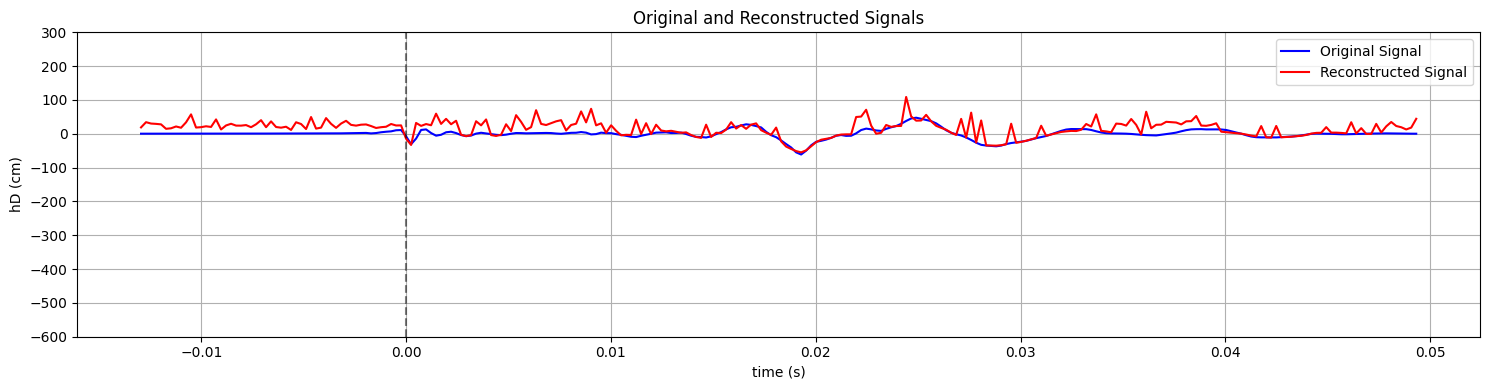

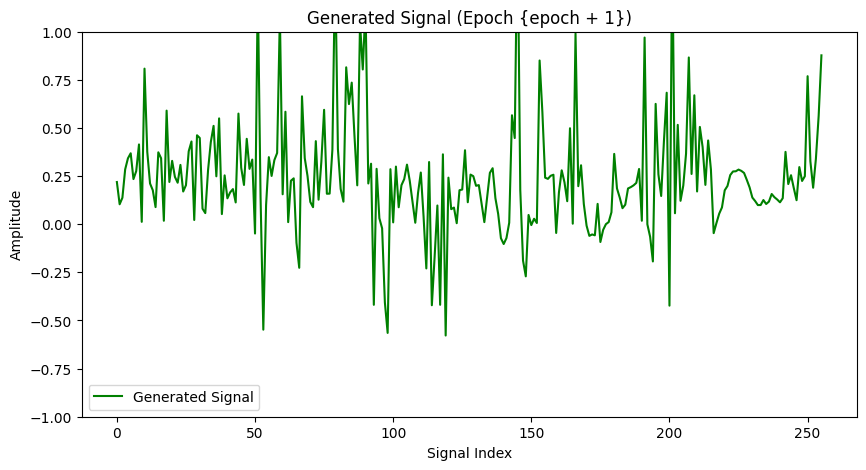

Epoch 251 complete! 	Average Loss: 150.4723
Epoch 252 complete! 	Average Loss: 153.5613
Epoch 253 complete! 	Average Loss: 150.3353
Epoch 254 complete! 	Average Loss: 153.7622
Epoch 255 complete! 	Average Loss: 156.7626
Epoch 256 complete! 	Average Loss: 156.5696
Epoch 257 complete! 	Average Loss: 153.6996
Epoch 258 complete! 	Average Loss: 153.3936
Epoch 259 complete! 	Average Loss: 151.9669
Epoch 260 complete! 	Average Loss: 159.7653


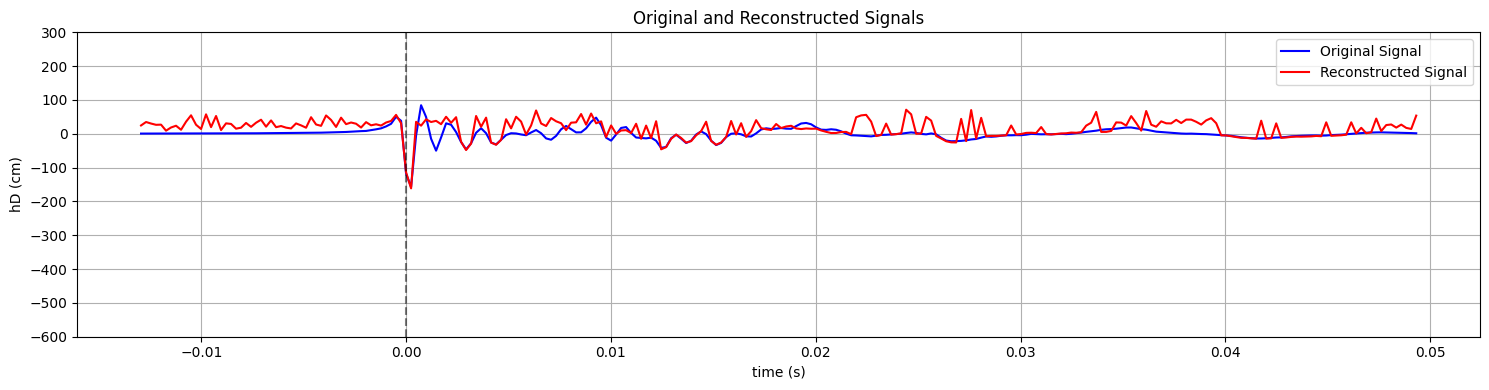

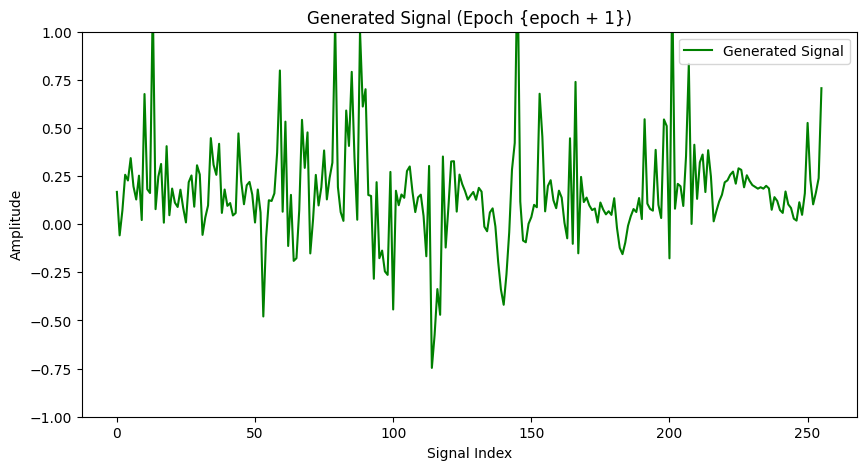

Epoch 261 complete! 	Average Loss: 152.4444
Epoch 262 complete! 	Average Loss: 151.8272
Epoch 263 complete! 	Average Loss: 159.9760
Epoch 264 complete! 	Average Loss: 159.1527
Epoch 265 complete! 	Average Loss: 155.1896
Epoch 266 complete! 	Average Loss: 152.7763
Epoch 267 complete! 	Average Loss: 152.7787
Epoch 268 complete! 	Average Loss: 148.0931
Epoch 269 complete! 	Average Loss: 152.2507
Epoch 270 complete! 	Average Loss: 152.5225


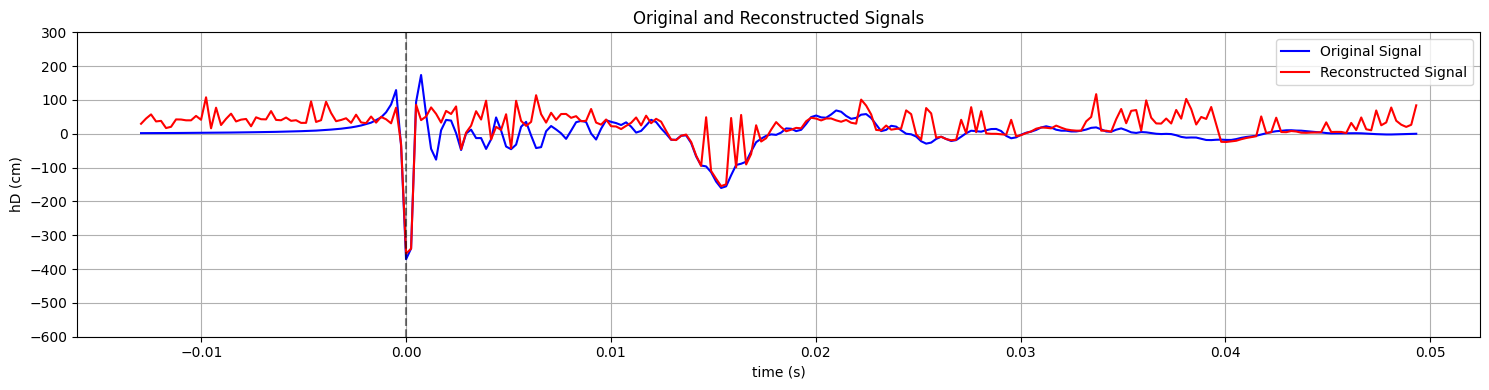

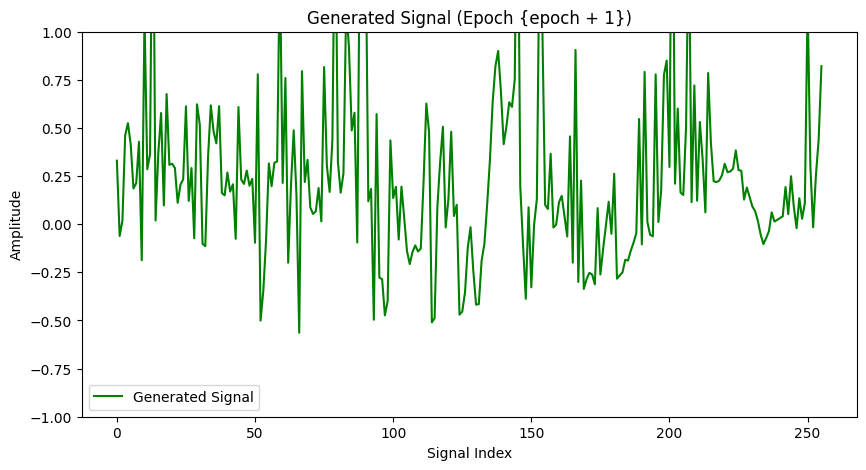

Epoch 271 complete! 	Average Loss: 160.4111
Epoch 272 complete! 	Average Loss: 156.7525
Epoch 273 complete! 	Average Loss: 150.5908
Epoch 274 complete! 	Average Loss: 152.5861
Epoch 275 complete! 	Average Loss: 152.4571
Epoch 276 complete! 	Average Loss: 149.5731
Epoch 277 complete! 	Average Loss: 150.3256
Epoch 278 complete! 	Average Loss: 148.9184
Epoch 279 complete! 	Average Loss: 143.3705
Epoch 280 complete! 	Average Loss: 151.1487


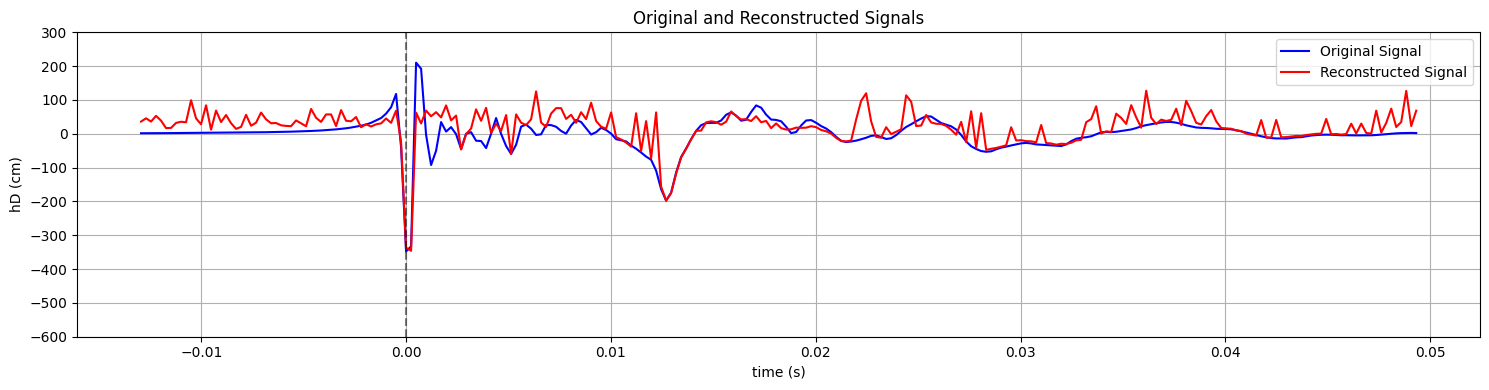

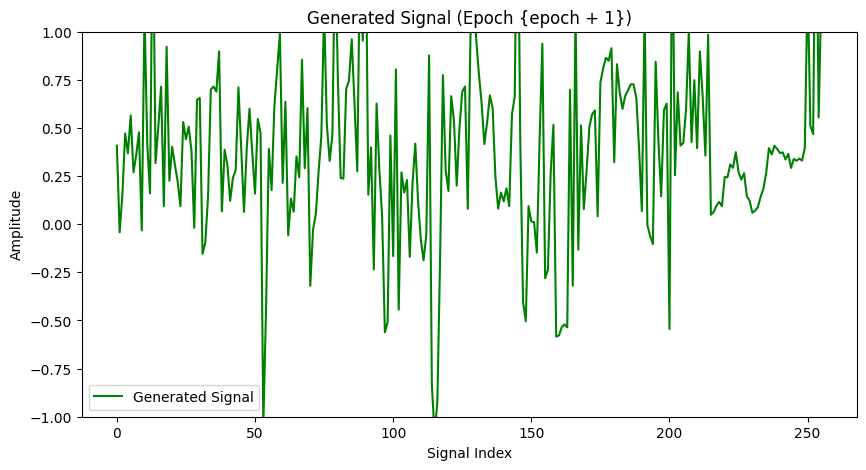

Epoch 281 complete! 	Average Loss: 148.0051
Epoch 282 complete! 	Average Loss: 147.2871
Epoch 283 complete! 	Average Loss: 155.1080
Epoch 284 complete! 	Average Loss: 152.0158
Epoch 285 complete! 	Average Loss: 158.1004
Epoch 286 complete! 	Average Loss: 162.7501
Epoch 287 complete! 	Average Loss: 161.5239
Epoch 288 complete! 	Average Loss: 163.5316
Epoch 289 complete! 	Average Loss: 165.4099
Epoch 290 complete! 	Average Loss: 167.7333


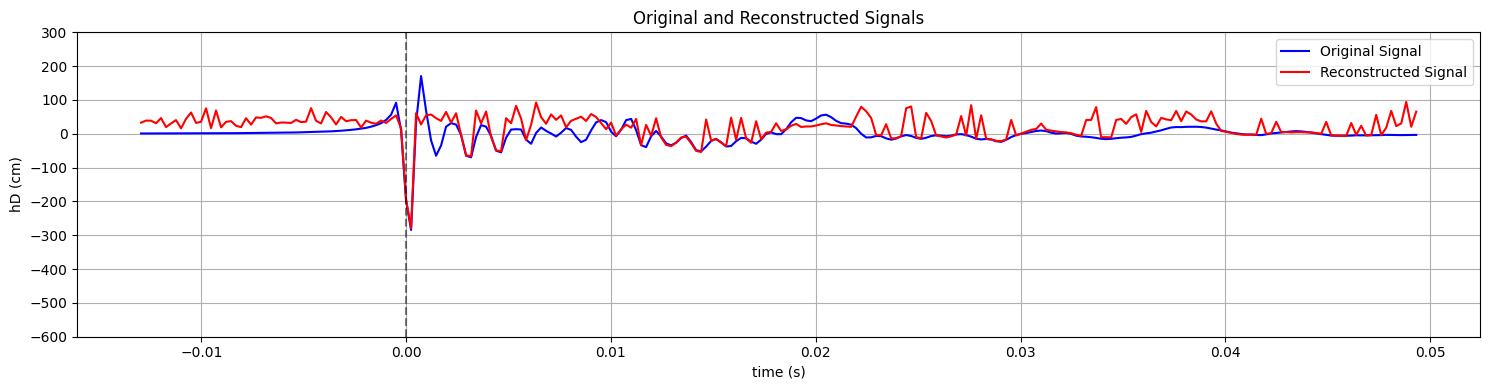

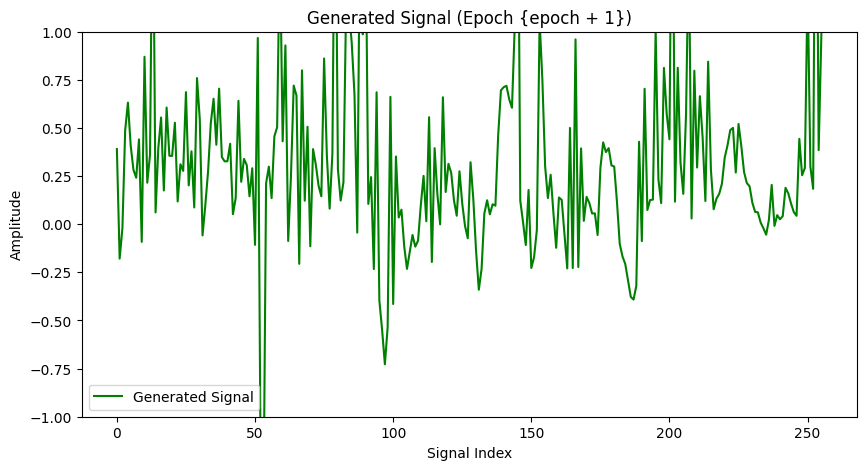

Epoch 291 complete! 	Average Loss: 168.3619
Epoch 292 complete! 	Average Loss: 167.9132
Epoch 293 complete! 	Average Loss: 169.9443
Epoch 294 complete! 	Average Loss: 170.5967
Epoch 295 complete! 	Average Loss: 169.7574
Epoch 296 complete! 	Average Loss: 166.5091
Epoch 297 complete! 	Average Loss: 164.7231
Epoch 298 complete! 	Average Loss: 156.1085
Epoch 299 complete! 	Average Loss: 155.2973
Epoch 300 complete! 	Average Loss: 148.0232


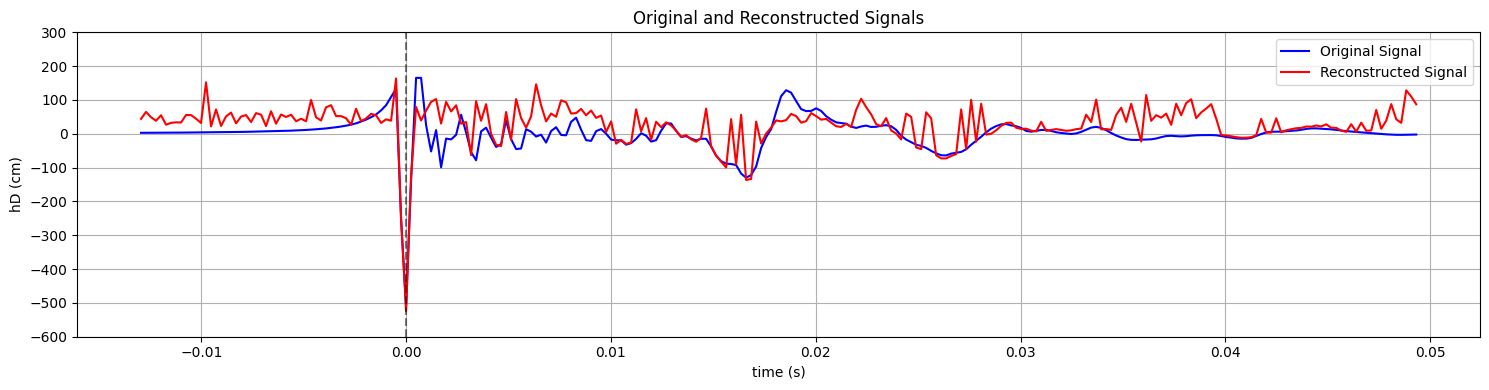

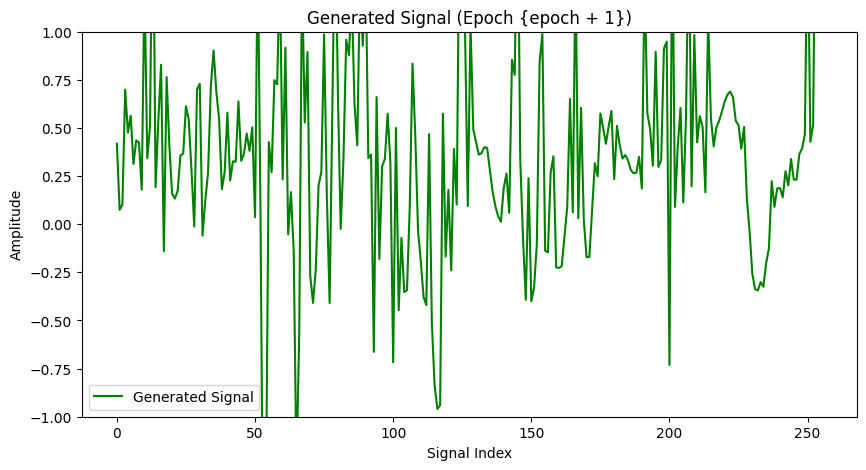

Epoch 301 complete! 	Average Loss: 151.4704
Epoch 302 complete! 	Average Loss: 153.1573
Epoch 303 complete! 	Average Loss: 147.5602
Epoch 304 complete! 	Average Loss: 146.9816
Epoch 305 complete! 	Average Loss: 156.2396
Epoch 306 complete! 	Average Loss: 159.0646
Epoch 307 complete! 	Average Loss: 162.4822
Epoch 308 complete! 	Average Loss: 168.3366
Epoch 309 complete! 	Average Loss: 167.4034
Epoch 310 complete! 	Average Loss: 166.3889


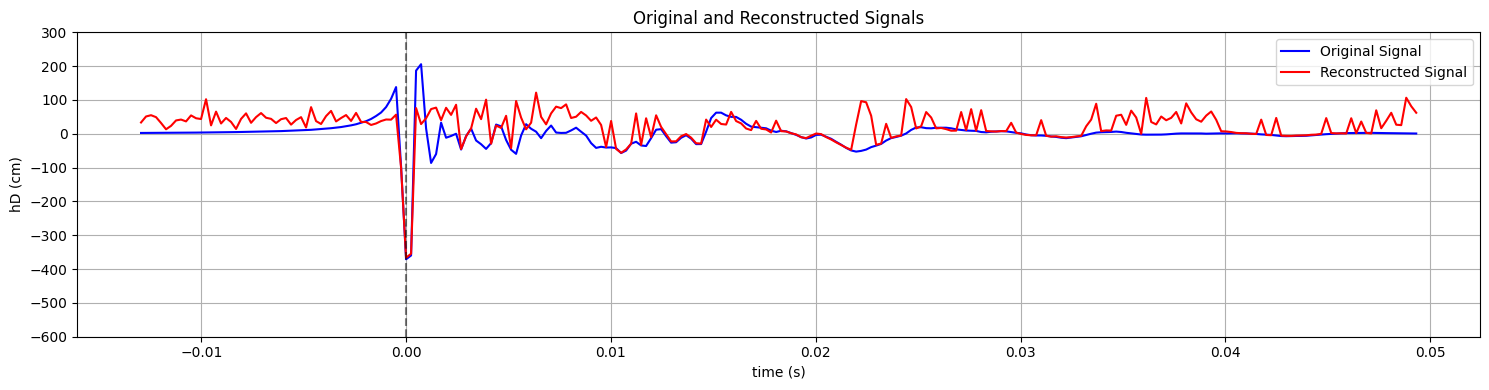

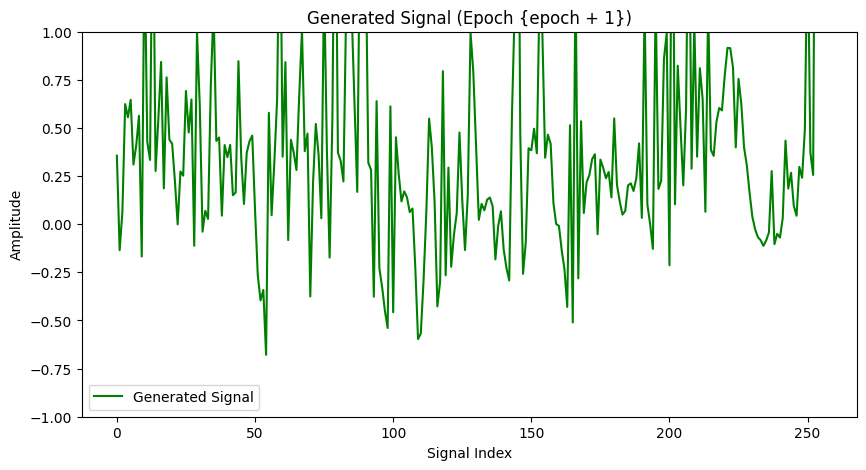

Epoch 311 complete! 	Average Loss: 167.7787
Epoch 312 complete! 	Average Loss: 171.3990
Epoch 313 complete! 	Average Loss: 168.5939
Epoch 314 complete! 	Average Loss: 167.7519
Epoch 315 complete! 	Average Loss: 171.8831
Epoch 316 complete! 	Average Loss: 168.2549
Epoch 317 complete! 	Average Loss: 164.3473
Epoch 318 complete! 	Average Loss: 166.9184
Epoch 319 complete! 	Average Loss: 170.2357
Epoch 320 complete! 	Average Loss: 169.9214


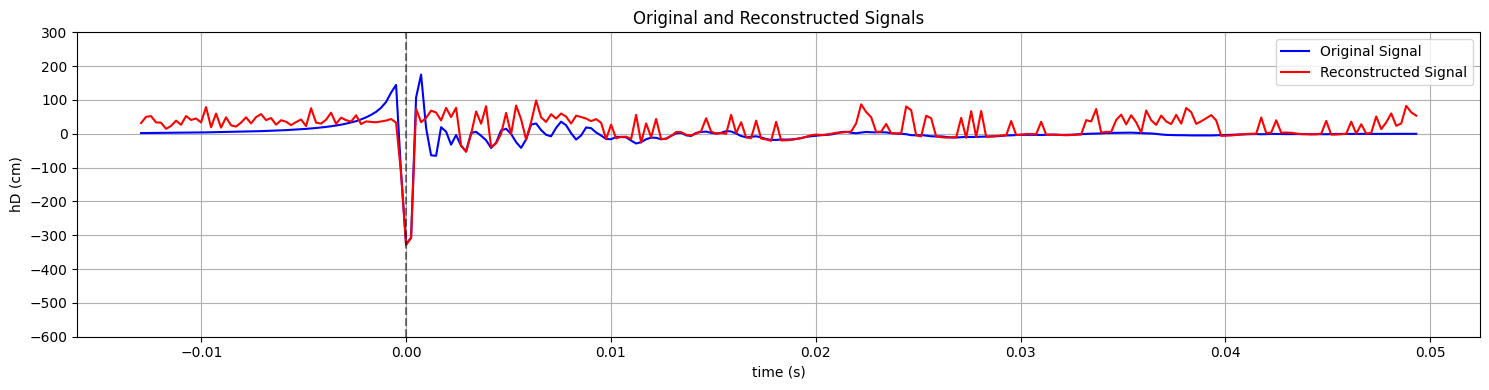

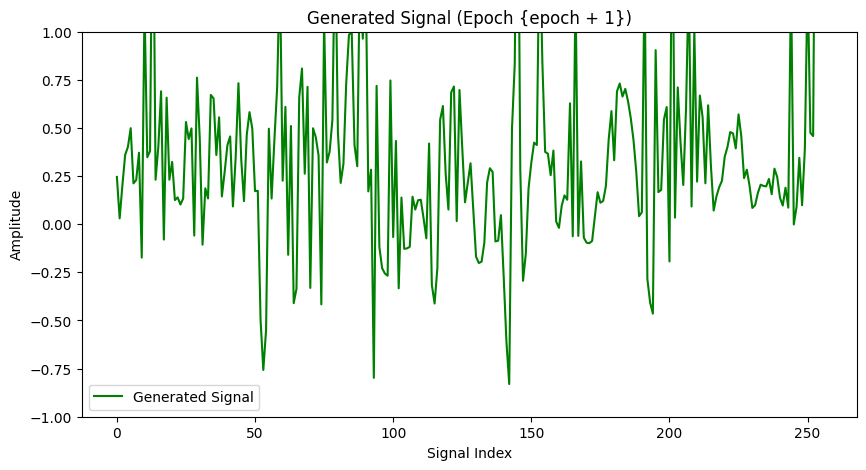

Training finished!


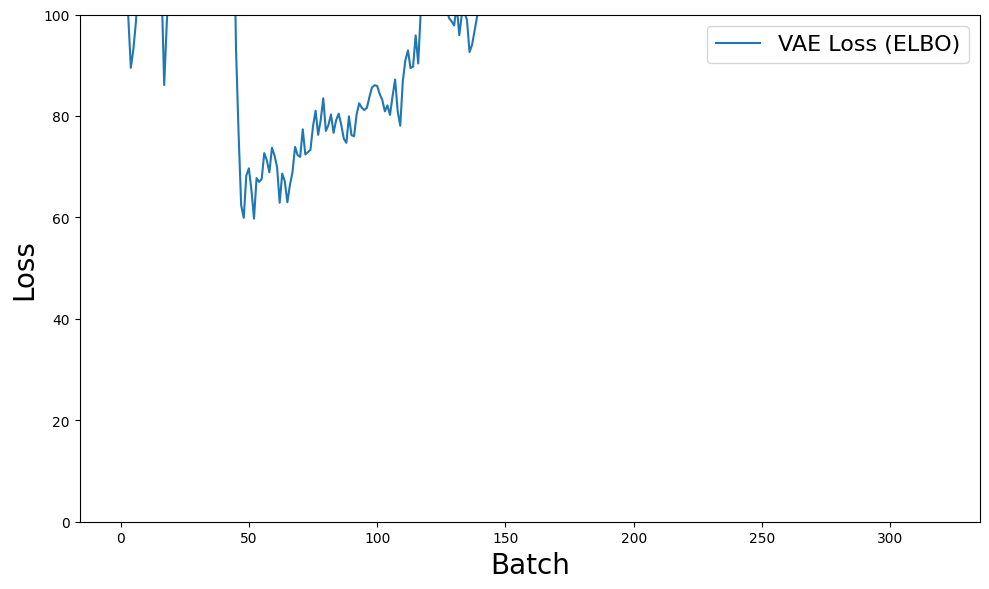

In [11]:
print("Start training VAE...")
model.train()

avg_losses = []

for epoch in range(epochs):
    overall_loss = 0
    total_samples = 0

    for batch_idx, x in enumerate(train_dataloader, 0):
        x = x.view(x.size(0), -1)  # Reshape to (batch_size, 256) if needed
        x = x.to(DEVICE)

        optimizer.zero_grad()

        x_hat, mean, log_var = model(x)
        loss = loss_function(x, x_hat, mean, log_var)
        
        overall_loss += loss.item()
        total_samples += x.size(0)

        loss.backward()
        optimizer.step()

    avg_loss = overall_loss / total_samples
    avg_losses.append(avg_loss)
    print(f"Epoch {epoch + 1} complete! \tAverage Loss: {avg_loss:.4f}")

    if (epoch + 1) % 10 == 0:
        x = x.cpu().detach()
        x_hat = x_hat.cpu().detach()
        plot_reconstruction(x[0], x_hat[0], max_value=train_dataset.max_value)

        with torch.no_grad():
            noise = torch.randn(batch_size, latent_dim).to(DEVICE)
            generated_signals = decoder(noise).cpu().detach().numpy()

            plt.figure(figsize=(10, 5))
            plt.plot(generated_signals[0], label="Generated Signal", color='green')
            plt.title("Generated Signal (Epoch {epoch + 1})")
            plt.xlabel("Signal Index")
            plt.ylabel("Amplitude")
            plt.ylim(-1, 1)
            plt.legend()
            plt.show()

            # plot_waveform_grid(generated_signals, max_value=train_dataset.max_value)

plot_loss(avg_losses)
print("Training finished!")